In [235]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,10)
from sklearn import model_selection
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings("ignore")

In [236]:
#read in the data
ny = pd.read_csv('./new_york.csv')

In [237]:
ny

indicator  ... sentiment__positive
0                        Symptoms of Depressive Disorder  ...                50.0
1                        Symptoms of Depressive Disorder  ...                50.0
2                        Symptoms of Depressive Disorder  ...                50.0
3                        Symptoms of Depressive Disorder  ...                50.0
4                        Symptoms of Depressive Disorder  ...                50.0
...                                                  ...  ...                 ...
35779  Symptoms of Anxiety Disorder or Depressive Dis...  ...                49.0
35780  Symptoms of Anxiety Disorder or Depressive Dis...  ...                49.0
35781  Symptoms of Anxiety Disorder or Depressive Dis...  ...                49.0
35782  Symptoms of Anxiety Disorder or Depressive Dis...  ...                49.0
35783  Symptoms of Anxiety Disorder or Depressive Dis...  ...                49.0

[35784 rows x 25 columns]

In [238]:
ny["indicator"].replace({"Symptoms of Anxiety Disorder": "0", "Symptoms of Depressive Disorder": "1", "Symptoms of Anxiety Disorder or Depressive Disorder": "2"}, inplace=True)
ny["age"].replace({"18 - 29 years": "29", "30 - 39 years": "39", "40 - 49 years": "49", "50 - 59 years":"59","60 - 69 years":"69","70 - 79 years":"79","80 years and above":"80"}, inplace=True)


In [239]:
data_to_use = ny
del data_to_use['group']
del data_to_use['state']
del data_to_use['subgroup']
del data_to_use['time_period_label']
del data_to_use['confidence_interval']
del data_to_use['quartile_range']

ny = data_to_use
ny.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35784 entries, 0 to 35783
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   indicator               35784 non-null  object 
 1   phase                   35784 non-null  object 
 2   time_period             35784 non-null  float64
 3   time_period_start_date  35784 non-null  object 
 4   time_period_end_date    35784 non-null  object 
 5   value                   35784 non-null  float64
 6   lowci                   35784 non-null  float64
 7   highci                  35784 non-null  float64
 8   age                     35784 non-null  object 
 9   CASE_RATE               35784 non-null  float64
 10  HOSPITALIZED_RATE       35784 non-null  float64
 11  DEATH_RATE              33957 non-null  float64
 12  date                    35784 non-null  object 
 13  CASE_COUNT              35784 non-null  float64
 14  HOSPITALIZED_COUNT      35784 non-null

In [240]:
data_to_use

indicator              phase  ...  sentiment__negative sentiment__positive
0             1                  1  ...                500.0                50.0
1             1                  1  ...                500.0                50.0
2             1                  1  ...                500.0                50.0
3             1                  1  ...                500.0                50.0
4             1                  1  ...                500.0                50.0
...         ...                ...  ...                  ...                 ...
35779         2  3 (Jan 6 � Feb 1)  ...                501.0                49.0
35780         2  3 (Jan 6 � Feb 1)  ...                501.0                49.0
35781         2  3 (Jan 6 � Feb 1)  ...                501.0                49.0
35782         2  3 (Jan 6 � Feb 1)  ...                501.0                49.0
35783         2  3 (Jan 6 � Feb 1)  ...                501.0                49.0

[35784 rows x 19 columns]

In [241]:
ny['DEATH_RATE'].fillna((ny['DEATH_RATE'].mean()), inplace=True)
ny.isna().sum()

indicator                 0
phase                     0
time_period               0
time_period_start_date    0
time_period_end_date      0
value                     0
lowci                     0
highci                    0
age                       0
CASE_RATE                 0
HOSPITALIZED_RATE         0
DEATH_RATE                0
date                      0
CASE_COUNT                0
HOSPITALIZED_COUNT        0
DEATH_COUNT               0
counts                    0
sentiment__negative       0
sentiment__positive       0
dtype: int64

In [242]:
#Add this cell after API change
ny.loc[ny['phase'] == ('Oct 28 � Dec 21'), 'phase'] = 3
ny.loc[ny['phase'] == ('3 (Oct 28 � Dec 21)'), 'phase'] = 4
ny.loc[ny['phase'] == ('3 (Jan 6 � Feb 1)'), 'phase'] = 5
ny.rename(columns = {'counts':'twitter_count'}, inplace = True)

In [243]:
ny['phase'].unique()

array(['1', '2', 4, 5], dtype=object)

In [244]:
from sklearn import preprocessing

ny["age"] = ny['age'].astype(float)
ny["phase"] = ny['phase'].astype(float)
ny["indicator"] = ny['indicator'].astype(float)
ny["time_period"] = ny['time_period'].astype(float)

"""def min_max_normalization(df):
    # copy the dataframe
    df_norm = df.copy()
    # apply min-max scaling
    for column in df_norm.columns:
        df_norm[column] = (df_norm[column] - df_norm[column].min()) / (df_norm[column].max() - df_norm[column].min())
        
    return df_norm

ny = min_max_normalization(data_to_use)"""
ny

indicator  phase  ...  sentiment__negative sentiment__positive
0            1.0    1.0  ...                500.0                50.0
1            1.0    1.0  ...                500.0                50.0
2            1.0    1.0  ...                500.0                50.0
3            1.0    1.0  ...                500.0                50.0
4            1.0    1.0  ...                500.0                50.0
...          ...    ...  ...                  ...                 ...
35779        2.0    5.0  ...                501.0                49.0
35780        2.0    5.0  ...                501.0                49.0
35781        2.0    5.0  ...                501.0                49.0
35782        2.0    5.0  ...                501.0                49.0
35783        2.0    5.0  ...                501.0                49.0

[35784 rows x 19 columns]

In [245]:
ny = ny[['phase', 'time_period', 'value', 'lowci', 'highci', 'age', 'CASE_RATE', 'HOSPITALIZED_RATE','DEATH_RATE','CASE_COUNT','HOSPITALIZED_COUNT','DEATH_COUNT','sentiment__negative', 'sentiment__positive','indicator']]
ny

phase  time_period  ...  sentiment__positive  indicator
0        1.0          1.0  ...                 50.0        1.0
1        1.0          1.0  ...                 50.0        1.0
2        1.0          1.0  ...                 50.0        1.0
3        1.0          1.0  ...                 50.0        1.0
4        1.0          1.0  ...                 50.0        1.0
...      ...          ...  ...                  ...        ...
35779    5.0         23.0  ...                 49.0        2.0
35780    5.0         23.0  ...                 49.0        2.0
35781    5.0         23.0  ...                 49.0        2.0
35782    5.0         23.0  ...                 49.0        2.0
35783    5.0         23.0  ...                 49.0        2.0

[35784 rows x 15 columns]

In [246]:
values = ny.values
 
Y = values[:,14]
X = values[:,0:14]
Y

array([1., 1., 1., ..., 2., 2., 2.])

In [247]:
random_seed = 12

In [248]:
X

array([[1.00000000e+00, 1.00000000e+00, 2.87000000e+01, ...,
        6.75480913e+03, 5.00000000e+02, 5.00000000e+01],
       [1.00000000e+00, 1.00000000e+00, 2.87000000e+01, ...,
        6.75480913e+03, 5.00000000e+02, 5.00000000e+01],
       [1.00000000e+00, 1.00000000e+00, 2.87000000e+01, ...,
        6.75480913e+03, 5.00000000e+02, 5.00000000e+01],
       ...,
       [5.00000000e+00, 2.30000000e+01, 3.58000000e+01, ...,
        5.44000000e+03, 5.01000000e+02, 4.90000000e+01],
       [5.00000000e+00, 2.30000000e+01, 3.58000000e+01, ...,
        1.11750000e+04, 5.01000000e+02, 4.90000000e+01],
       [5.00000000e+00, 2.30000000e+01, 3.58000000e+01, ...,
        2.22310000e+04, 5.01000000e+02, 4.90000000e+01]])

In [249]:
names = ['Symptoms of Anxiety Disorder', 'Symptoms of Depression Disorder', 'Symptoms of Anxiety or Depression Disorder' ]
feature_names = ['phase', 'time_period', 'value', 'lowci', 'highci', 'age', 'CASE_RATE', 'HOSPITALIZED_RATE', 'DEATH_RATE', 'CASE_COUNT', 'HOSPITALIZED_COUNT', 'DEATH_COUNT', 'sentiment__negative','sentiment__positive']

In [250]:
import pandas as pd
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(X)
X = pd.DataFrame(x_scaled)

In [251]:
from sklearn.ensemble import RandomForestClassifier
outcome = []
model_names = []
models = [('LogReg', LogisticRegression()), 
          ('SVM', SVC()), 
          ('DecTree', DecisionTreeClassifier()),
          ('KNN', KNeighborsClassifier()),
          ('LinDisc', LinearDiscriminantAnalysis()),
          ('GaussianNB', GaussianNB()),
          ('RanForest', RandomForestClassifier())]

In [99]:
for model_name, model in models:
    k_fold_validation = model_selection.KFold(n_splits=10, random_state=random_seed)
    results = model_selection.cross_val_score(model, X, Y, cv=k_fold_validation, scoring='accuracy')
    outcome.append(results)
    model_names.append(model_name)
    output_message = "%s| Mean=%f STD=%f" % (model_name, results.mean(), results.std())
    print(output_message)

LogReg| Mean=0.804950 STD=0.122711
SVM| Mean=0.765962 STD=0.130235
DecTree| Mean=0.829817 STD=0.160592
KNN| Mean=0.800781 STD=0.150575
LinDisc| Mean=0.835157 STD=0.114623
GaussianNB| Mean=0.765278 STD=0.187195
RanForest| Mean=0.828896 STD=0.143178


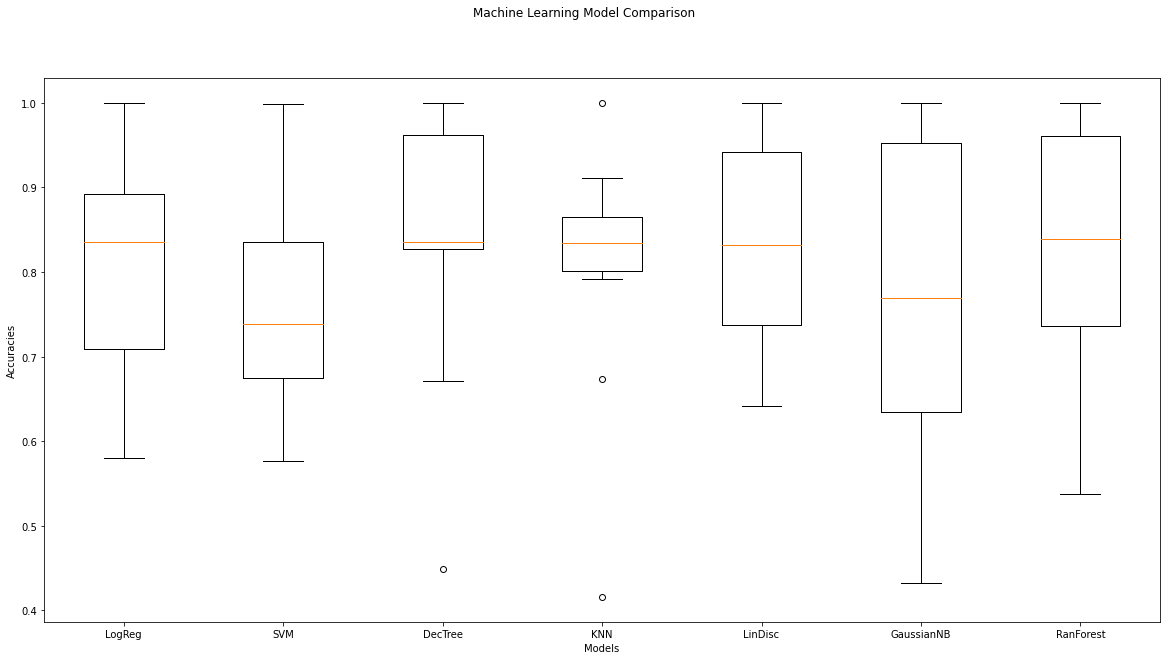

In [100]:
fig = plt.figure()
fig.suptitle('Machine Learning Model Comparison')
ax = fig.add_subplot(111)
plt.boxplot(outcome)
plt.xlabel('Models')
plt.ylabel('Accuracies')
ax.set_xticklabels(model_names)
plt.show()

In [252]:
import numpy as nump

uniqueValues, occurCount = nump.unique(Y, return_counts=True)
 
print("Unique Values : " , uniqueValues)
print("Occurrence Count : ", occurCount)

Unique Values :  [0. 1. 2.]
Occurrence Count :  [11928 11928 11928]


In [253]:
Y

array([1., 1., 1., ..., 2., 2., 2.])

In [254]:
import numpy as nump
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
enc = OneHotEncoder()
Y = enc.fit_transform(Y[:, nump.newaxis]).toarray()

In [255]:
X

0    1         2         3   ...        10        11        12        13
0      0.0  0.0  0.340102  0.294737  ...  0.245592  0.303533  0.607843  0.392157
1      0.0  0.0  0.340102  0.294737  ...  0.245592  0.303533  0.607843  0.392157
2      0.0  0.0  0.340102  0.294737  ...  0.245592  0.303533  0.607843  0.392157
3      0.0  0.0  0.340102  0.294737  ...  0.245592  0.303533  0.607843  0.392157
4      0.0  0.0  0.340102  0.294737  ...  0.245592  0.303533  0.607843  0.392157
...    ...  ...       ...       ...  ...       ...       ...       ...       ...
35779  1.0  1.0  0.700508  0.684211  ...  0.162334  0.035282  0.627451  0.372549
35780  1.0  1.0  0.700508  0.684211  ...  0.317444  0.215562  0.627451  0.372549
35781  1.0  1.0  0.700508  0.684211  ...  0.213387  0.244363  0.627451  0.372549
35782  1.0  1.0  0.700508  0.684211  ...  0.276986  0.502453  0.627451  0.372549
35783  1.0  1.0  0.700508  0.684211  ...  1.000000  1.000000  0.627451  0.372549

[35784 rows x 14 columns]

In [256]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.3, random_state=2)

In [257]:
n_features = X.shape[1]
n_classes = Y.shape[1]

In [258]:
import sklearn 
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [259]:
dt = DecisionTreeClassifier()
dt.fit(X_train, Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [260]:
y_pred = dt.predict(X_test)

In [261]:
from sklearn.metrics import classification_report

print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3580
           1       1.00      1.00      1.00      3571
           2       1.00      1.00      1.00      3585

   micro avg       1.00      1.00      1.00     10736
   macro avg       1.00      1.00      1.00     10736
weighted avg       1.00      1.00      1.00     10736
 samples avg       1.00      1.00      1.00     10736



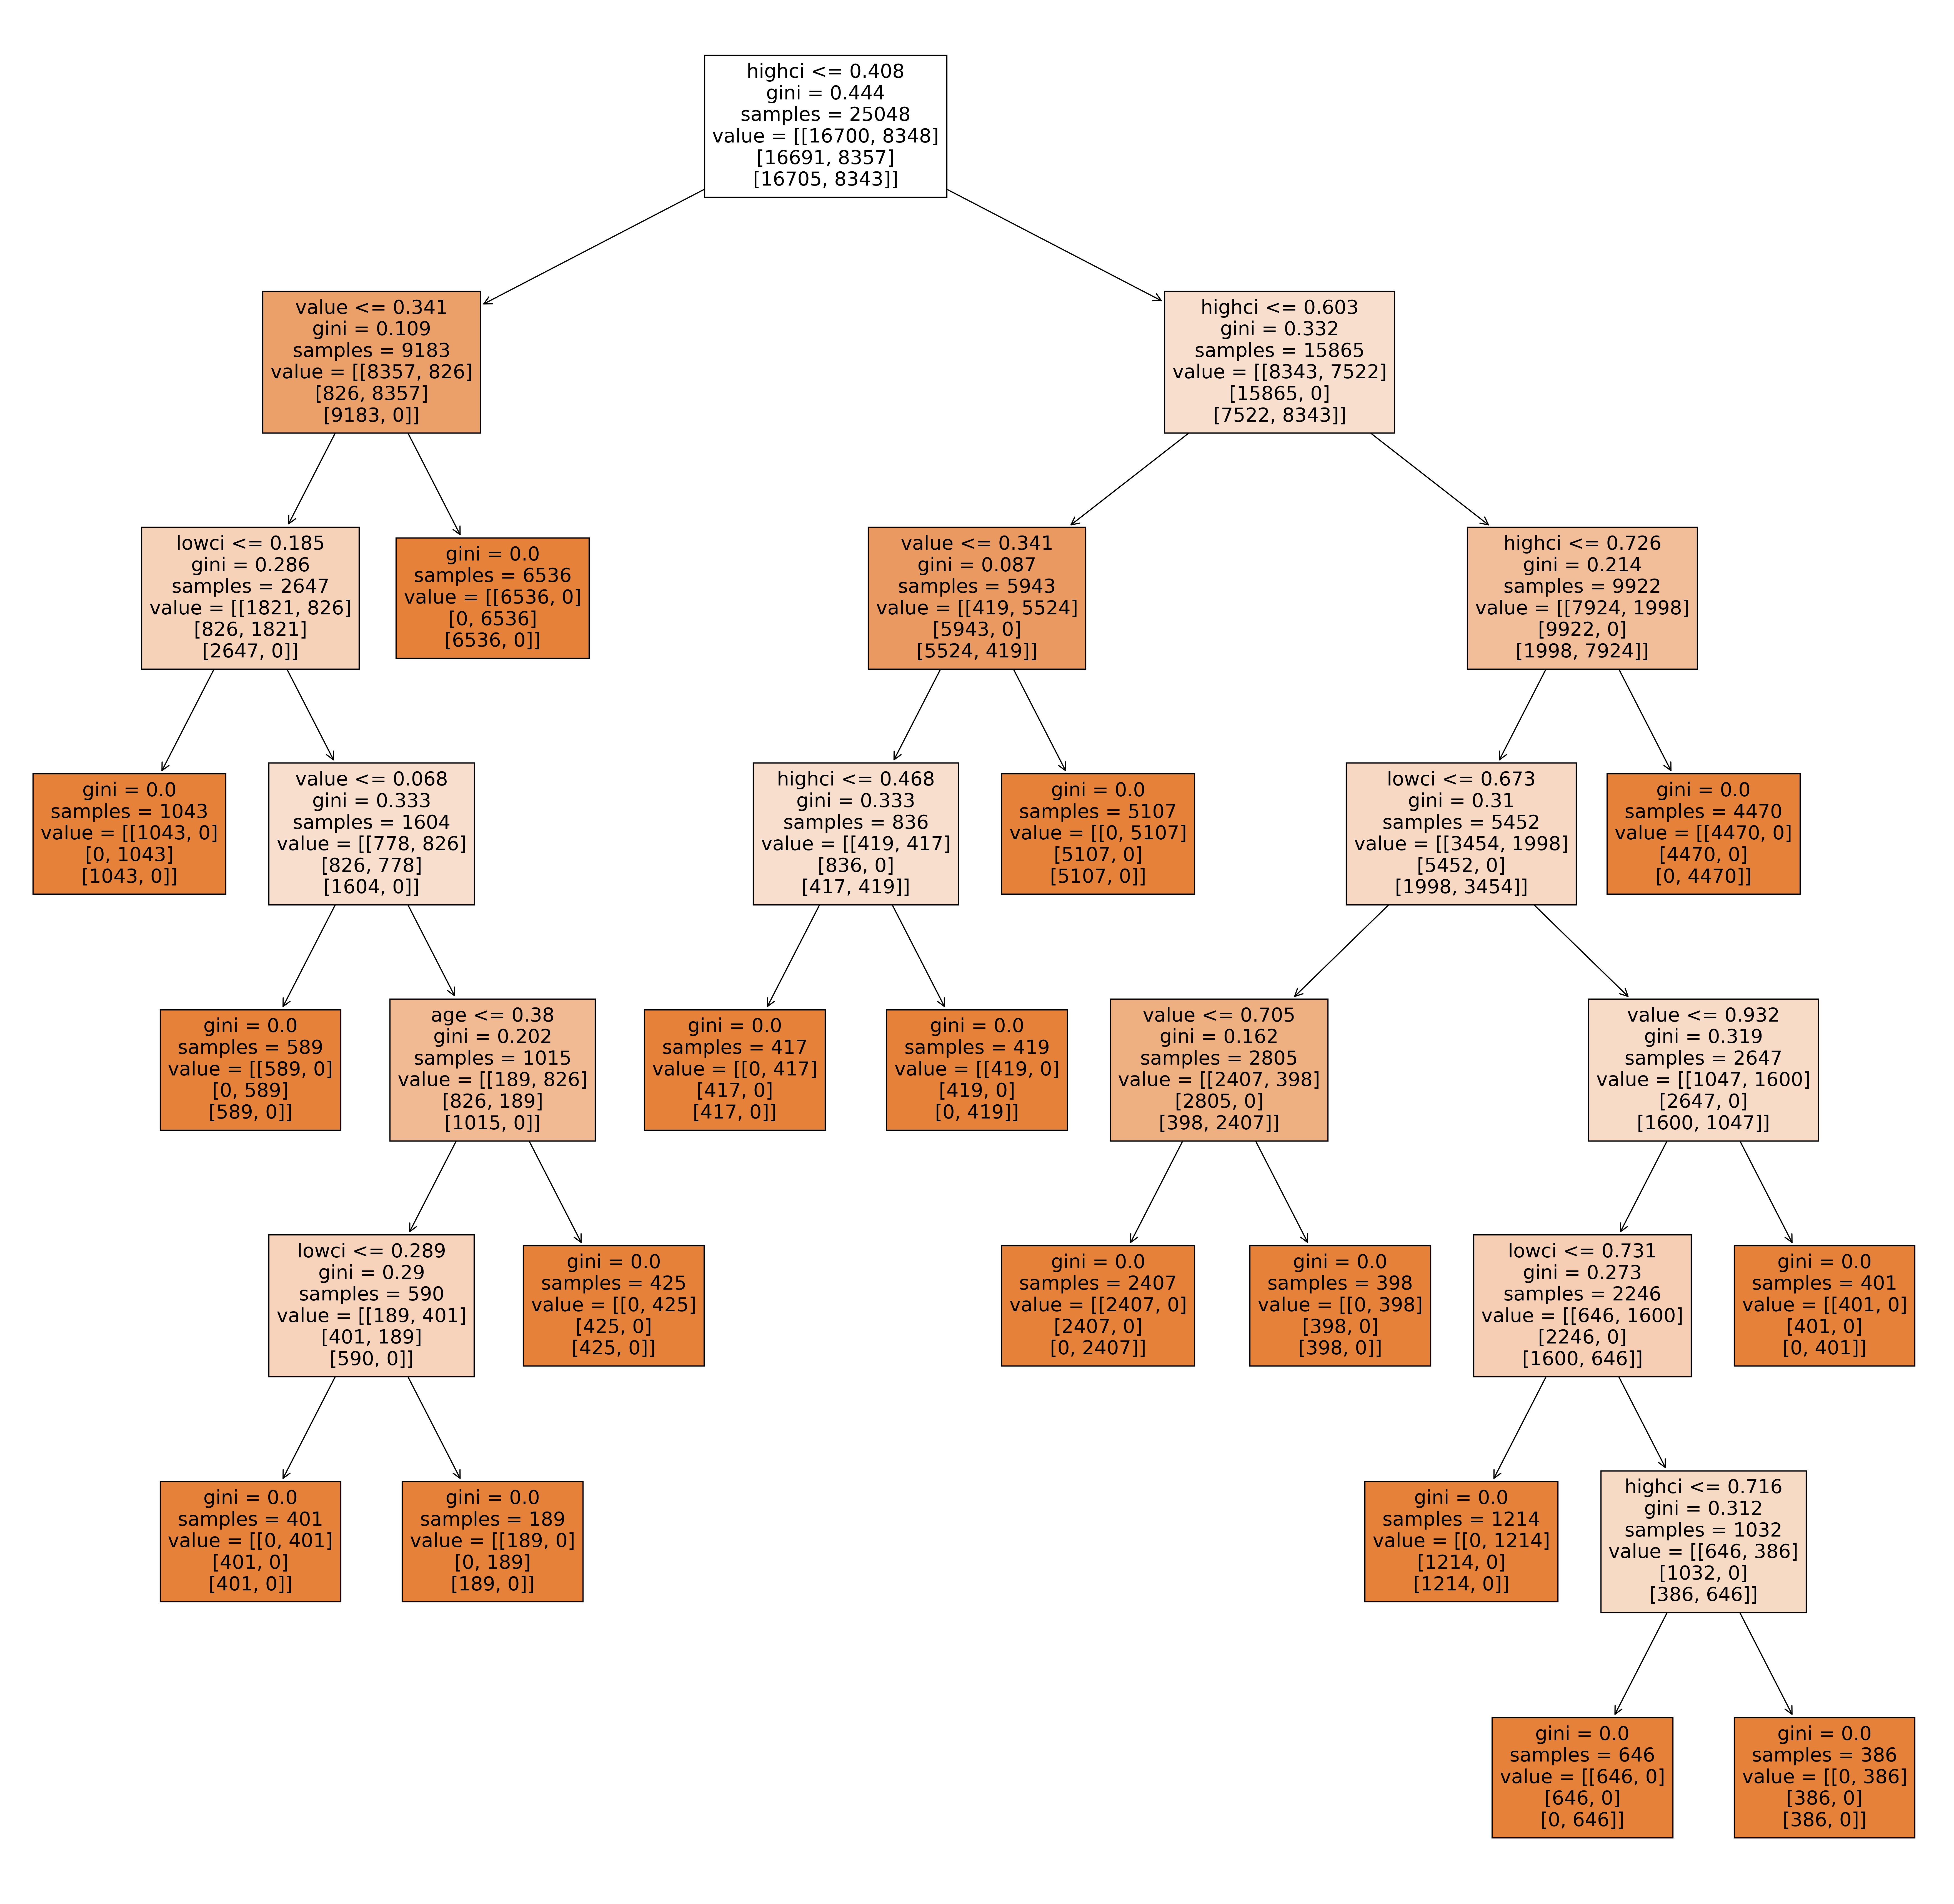

In [111]:
#!pip install -q graphviz
import graphviz
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree

fn=["time_period","value","lowci","highci","age","case_rate","hospitalized_rate","death_rate","case_count","hospitalized_count","death_count","twitter_count"]
cn=['Anxiety', 'Depression', 'Anxiety or Depression']

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (30,30), dpi=300)
tree.plot_tree(dt,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [262]:
from sklearn.metrics import accuracy_score
score = accuracy_score(Y_test, y_pred)
score

1.0

In [263]:
n_features

14

In [264]:
n_classes

3

In [265]:
n_features = X.shape[1]
n_classes = Y.shape[1]

In [266]:
n_features

14

In [117]:
ny

phase  time_period  ...  sentiment__positive  indicator
0        1.0          1.0  ...                 50.0        1.0
1        1.0          1.0  ...                 50.0        1.0
2        1.0          1.0  ...                 50.0        1.0
3        1.0          1.0  ...                 50.0        1.0
4        1.0          1.0  ...                 50.0        1.0
...      ...          ...  ...                  ...        ...
35779    5.0         23.0  ...                 49.0        2.0
35780    5.0         23.0  ...                 49.0        2.0
35781    5.0         23.0  ...                 49.0        2.0
35782    5.0         23.0  ...                 49.0        2.0
35783    5.0         23.0  ...                 49.0        2.0

[35784 rows x 15 columns]

In [ ]:
data2 = pd.read_csv('./new_york.csv')
#data2["indicator"].replace({"Symptoms of Anxiety Disorder": "1", "Symptoms of Depressive Disorder": "2", "Symptoms of Anxiety Disorder or Depressive Disorder": "3"}, inplace=True)
#data2["age"].replace({"18 - 29 years": "29", "30 - 39 years": "39", "40 - 49 years": "49", "50 - 59 years":"59","60 - 69 years":"69","70 - 79 years":"79","80 years and above":"80"}, inplace=True)

del data2['group']
del data2['state']
del data2['subgroup']
del data2['time_period_label']
del data2['confidence_interval']
del data2['quartile_range']

data2['DEATH_RATE'].fillna((data2['DEATH_RATE'].mean()), inplace=True)
data2.loc[data2['phase'] == ('Oct 28 � Dec 21'), 'phase'] = 3
data2.loc[data2['phase'] == ('3 (Oct 28 � Dec 21)'), 'phase'] = 4
data2.loc[data2['phase'] == ('3 (Jan 6 � Feb 1)'), 'phase'] = 5
data2.rename(columns = {'counts':'twitter_count'}, inplace = True)

In [ ]:
from sklearn import preprocessing

#data2["age"] = data2['age'].astype(float)
#data2["indicator"] = data2['indicator'].astype(float)
data2["phase"] = data2['phase'].astype(float)
#data2["indicator"] = data2['indicator'].astype(float)
data2["time_period"] = data2['time_period'].astype(float)


data2

indicator  phase  time_period  \
0                        Symptoms of Depressive Disorder    1.0          1.0   
1                        Symptoms of Depressive Disorder    1.0          1.0   
2                        Symptoms of Depressive Disorder    1.0          1.0   
3                        Symptoms of Depressive Disorder    1.0          1.0   
4                        Symptoms of Depressive Disorder    1.0          1.0   
...                                                  ...    ...          ...   
35779  Symptoms of Anxiety Disorder or Depressive Dis...    5.0         23.0   
35780  Symptoms of Anxiety Disorder or Depressive Dis...    5.0         23.0   
35781  Symptoms of Anxiety Disorder or Depressive Dis...    5.0         23.0   
35782  Symptoms of Anxiety Disorder or Depressive Dis...    5.0         23.0   
35783  Symptoms of Anxiety Disorder or Depressive Dis...    5.0         23.0   

        time_period_start_date     time_period_end_date  value  lowci  highci  \
0      2020-04-23T00:00:00.000  2020-05-05T00:00:00.000   28.7   24.6    33.1   
1      2020-04-23T00:00:00.000  2020-05-05T00:00:00.000   28.7   24.6    33.1   
2      2020-04-23T00:00:00.000  2020-05-05T00:00:00.000   28.7   24.6    33.1   
3      2020-04-23T00:00:00.000  2020-05-05T00:00:00.000   28.7   24.6    33.1   
4      2020-04-23T00:00:00.000  2020-05-05T00:00:00.000   28.7   24.6    33.1   
...                        ...                      ...    ...    ...     ...   
35779  2021-01-20T00:00:00.000  2021-02-01T00:00:00.000   35.8   32.0    39.7   
35780  2021-01-20T00:00:00.000  2021-02-01T00:00:00.000   35.8   32.0    39.7   
35781  2021-01-20T00:00:00.000  2021-02-01T00:00:00.000   35.8   32.0    39.7   
35782  2021-01-20T00:00:00.000  2021-02-01T00:00:00.000   35.8   32.0    39.7   
35783  2021-01-20T00:00:00.000  2021-02-01T00:00:00.000   35.8   32.0    39.7   

                      age  CASE_RATE  HOSPITALIZED_RATE  DEATH_RATE  \
0           18 - 29 years     171.46              13.55        0.23   
1           18 - 29 years    1554.45             153.69       12.88   
2           18 - 29 years    2529.03             630.34      113.37   
3           18 - 29 years    2552.64            1192.50      364.17   
4           18 - 29 years    2976.74            1830.07      909.18   
...                   ...        ...                ...         ...   
35779  80 years and above   20207.72            1160.60       67.68   
35780  80 years and above   15941.19            2540.10      476.51   
35781  80 years and above    7067.11            2418.35      756.82   
35782  80 years and above    7477.43            3995.12     1989.81   
35783  80 years and above    6302.86             958.30      266.66   

             date    CASE_COUNT  HOSPITALIZED_COUNT   DEATH_COUNT  \
0      2020-04-23   90629.21686        19942.175032   6754.809134   
1      2020-04-23   90629.21686        19942.175032   6754.809134   
2      2020-04-23   90629.21686        19942.175032   6754.809134   
3      2020-04-23   90629.21686        19942.175032   6754.809134   
4      2020-04-23   90629.21686        19942.175032   6754.809134   
...           ...           ...                 ...           ...   
35779  2021-02-01  224684.00000        13326.000000    794.000000   
35780  2021-02-01  161559.00000        25652.000000   4800.000000   
35781  2021-02-01   50798.00000        17383.000000   5440.000000   
35782  2021-02-01   41994.00000        22437.000000  11175.000000   
35783  2021-02-01  525458.00000        79892.000000  22231.000000   

       twitter_count  
0           816268.0  
1           816268.0  
2           816268.0  
3           816268.0  
4           816268.0  
...              ...  
35779       188024.0  
35780       188024.0  
35781       188024.0  
35782       188024.0  
35783       188024.0  

[35784 rows x 17 columns]

In [ ]:
data2["indicator"].value_counts()

Symptoms of Anxiety Disorder                           11928
Symptoms of Depressive Disorder                        11928
Symptoms of Anxiety Disorder or Depressive Disorder    11928
Name: indicator, dtype: int64

In [ ]:
#Consider removing cell
"""def min_max_normalization(df):
    # copy the dataframe
    df_norm = df.copy()
    # apply min-max scaling
    for column in df_norm.columns:
        df_norm[column] = (df_norm[column] - df_norm[column].min()) / (df_norm[column].max() - df_norm[column].min())
        
    return df_norm

data2 = min_max_normalization(data2)"""

'def min_max_normalization(df):\n    # copy the dataframe\n    df_norm = df.copy()\n    # apply min-max scaling\n    for column in df_norm.columns:\n        df_norm[column] = (df_norm[column] - df_norm[column].min()) / (df_norm[column].max() - df_norm[column].min())\n        \n    return df_norm\n\ndata2 = min_max_normalization(data2)'

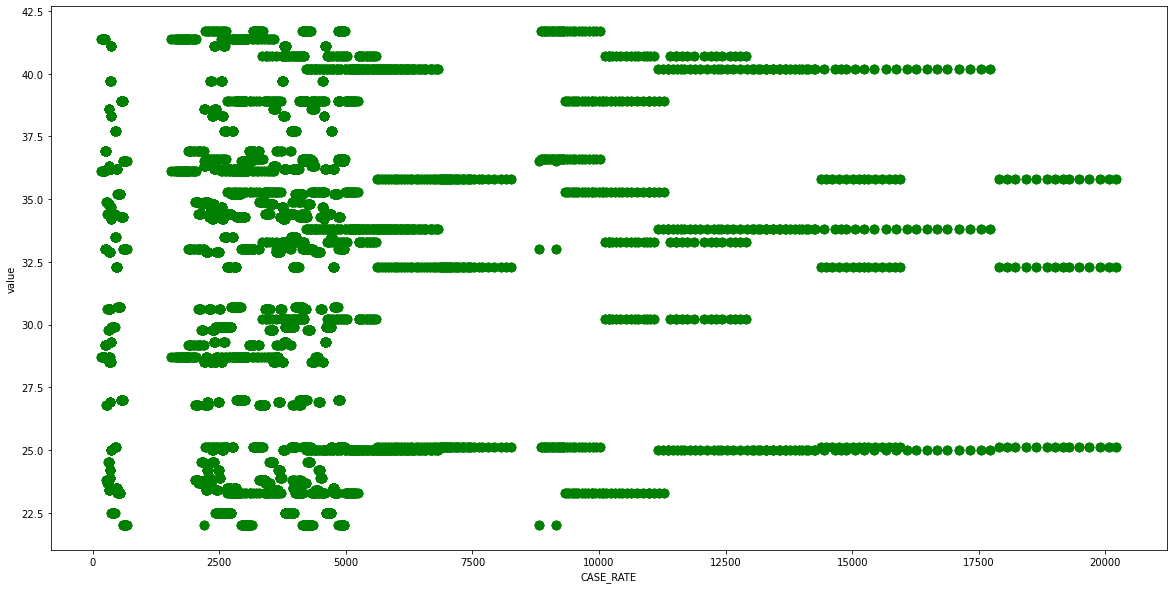

In [ ]:
data2.plot(kind="scatter", x="CASE_RATE", y="value", color="green",s=70)
plt.show()

In [ ]:
import pandas as pd
#!pip install seaborn
# To ignore warnings, use the following code to make the display more attractive.
# Import seaborn and matplotlib.
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white", color_codes=True)

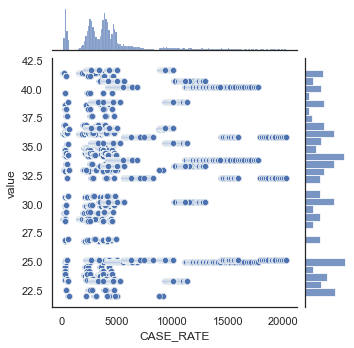

In [ ]:
sns.jointplot(x="CASE_RATE", y="value", data=data2, size=5)
plt.show()

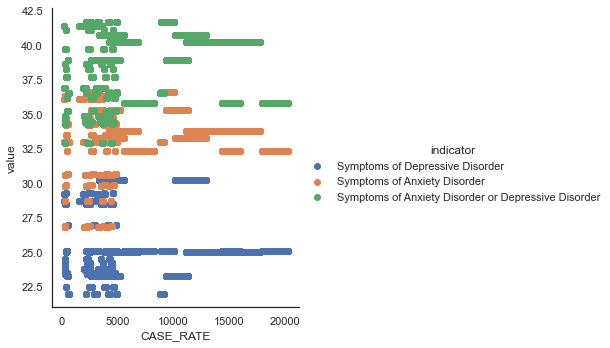

In [ ]:
sns.FacetGrid(data2, hue="indicator", size=5) \
   .map(plt.scatter, "CASE_RATE", "value") \
   .add_legend()
plt.show()

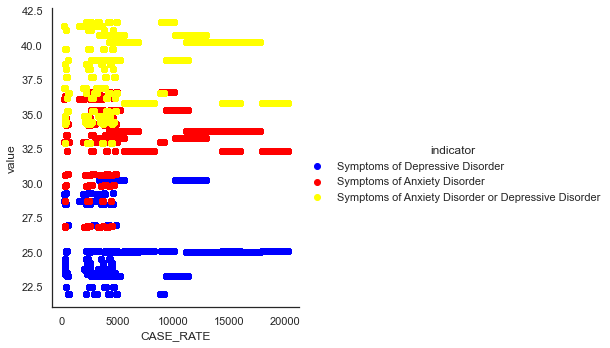

In [ ]:
# Change the colors of the data points in the graph above
# Assign the colors a variable name, and insert hue_kws="variable name" as shown.
KS = {'color': ['blue', 'red', 'yellow', 'Green', 'Orange']}
sns.FacetGrid(data2, hue_kws=KS, hue="indicator", size=5) \
   .map(plt.scatter, "CASE_RATE", "value") \
   .add_legend()
plt.show()

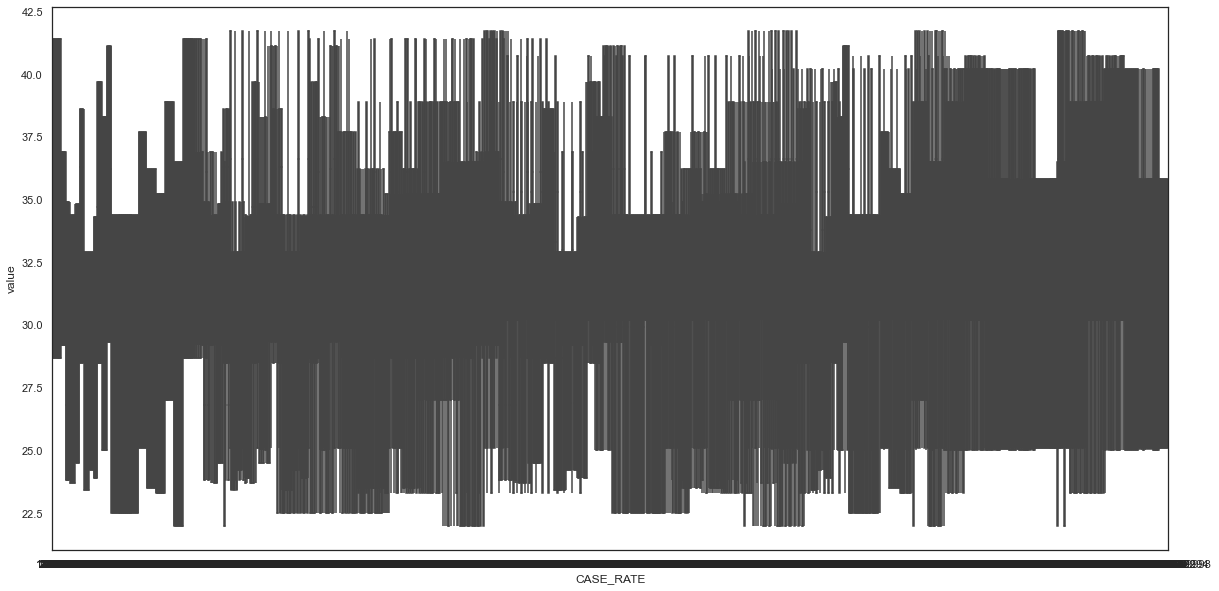

In [ ]:
sns.boxplot(x="CASE_RATE", y="value", data=data2 )
plt.show()

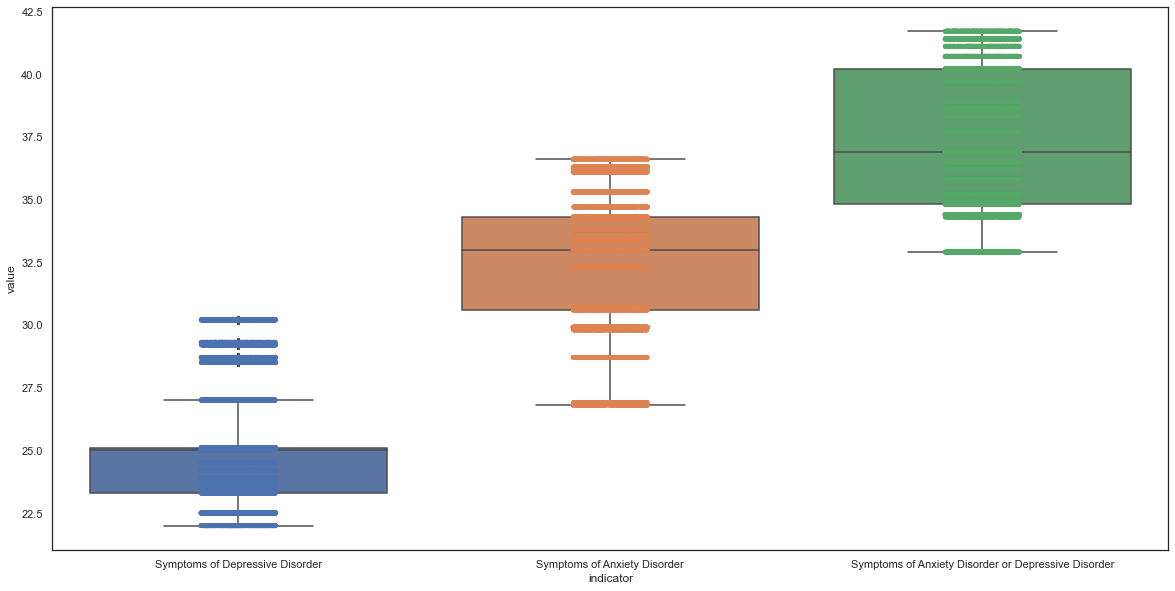

In [ ]:
# Use Seaborn's striplot to add data points on top of the box plot 
# Insert jitter=True so that the data points remain scattered and not piled into a verticle line.
# Assign ax to each axis, so that each plot is ontop of the previous axis. 

ax= sns.boxplot(x="indicator", y="value", data=data2)
ax= sns.stripplot(x="indicator", y="value", data=data2, jitter=True, edgecolor="gray")
plt.show()

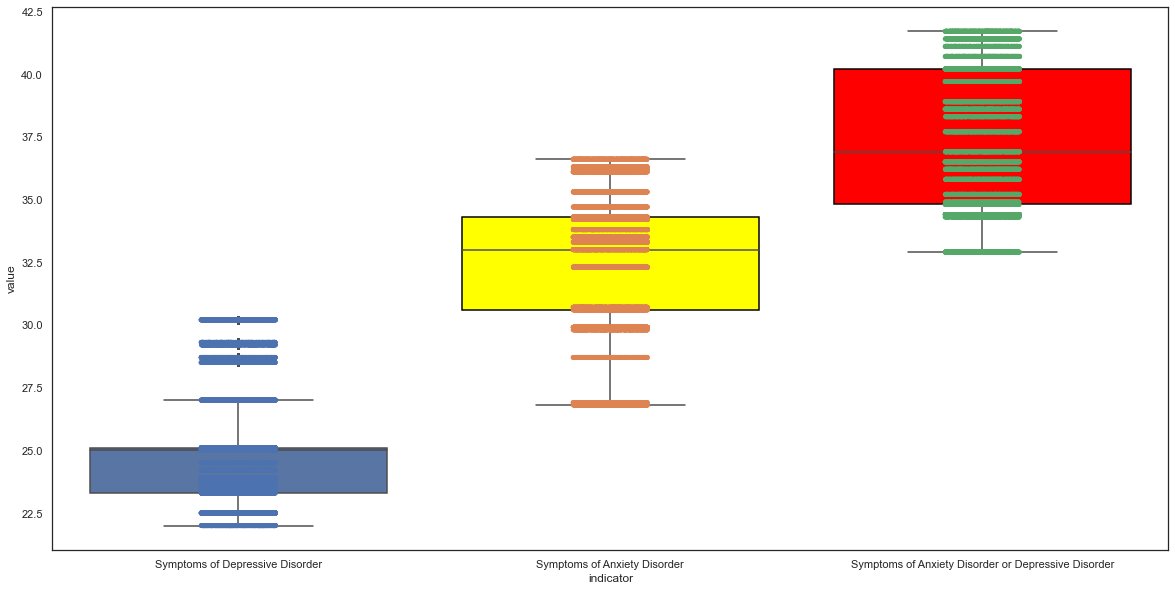

In [ ]:
# Tweek the plot above to change fill and border color color using ax.artists.
# Assing ax.artists a variable name, and insert the box number into the corresponding brackets

ax= sns.boxplot(x="indicator", y="value", data=data2)
ax= sns.stripplot(x="indicator", y="value", data=data2, jitter=True, edgecolor="gray")

boxtwo = ax.artists[2]
boxtwo.set_facecolor('red')
boxtwo.set_edgecolor('black')
boxthree=ax.artists[1]
boxthree.set_facecolor('yellow')
boxthree.set_edgecolor('black')

plt.show()

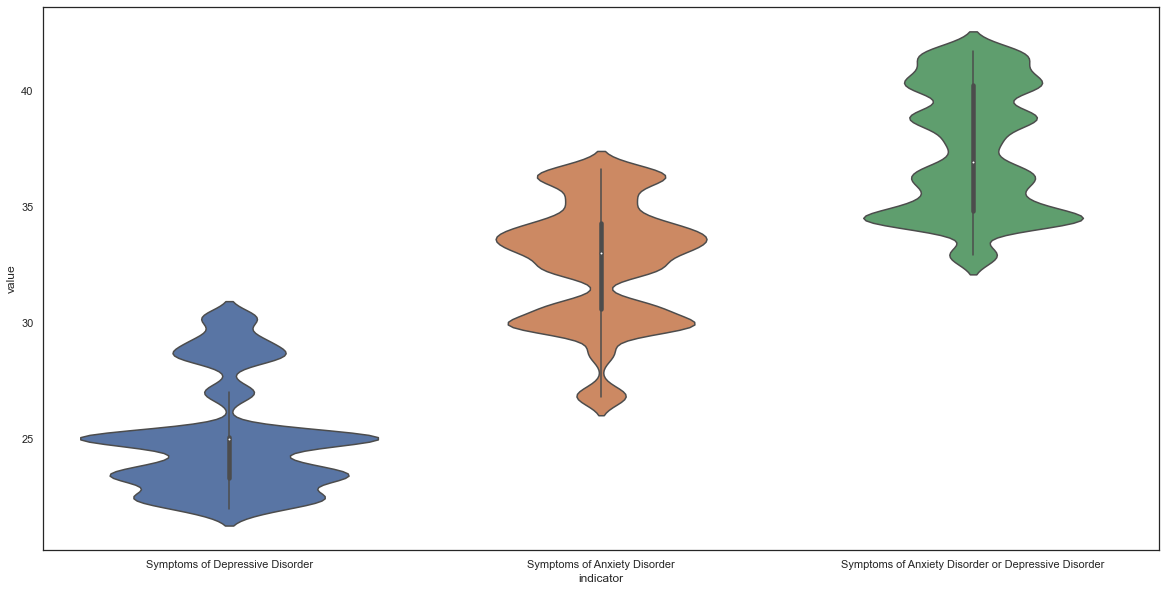

In [ ]:
# A violin plot shows the density of the data, simularly to a scatter plot,
#and presents catagorical data like a box plot.
# Denser regions of the data are fatter.
sns.violinplot(x="indicator", y="value", data=data2, size=6)
plt.show()

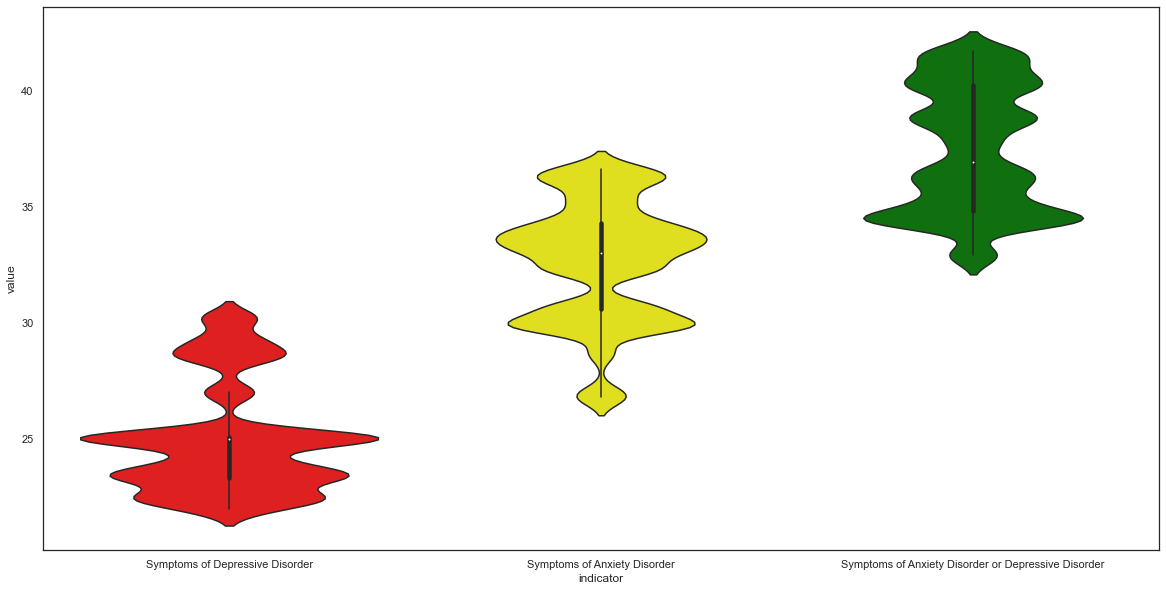

In [ ]:
sns.violinplot(x="indicator", y="value",  palette={"blue","red","yellow", "Green", "Orange"}, data=data2, size=6)
plt.show()

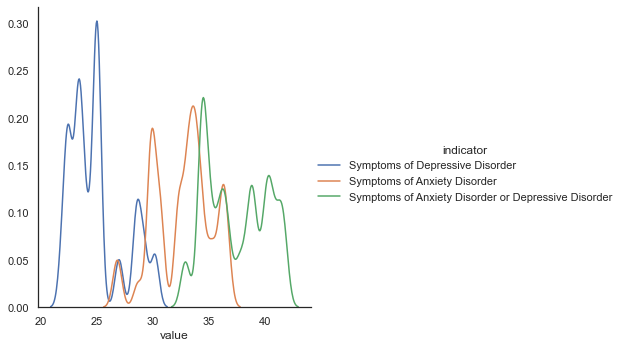

In [ ]:
# seaborn's kdeplot, plots univariate or bivariate density estimates.
#Size can be changed by tweeking the value used
sns.FacetGrid(data2, hue="indicator", size=5) \
   .map(sns.kdeplot, "value") \
   .add_legend()
plt.show()

In [ ]:
data2

indicator  phase  time_period  \
0                        Symptoms of Depressive Disorder    1.0          1.0   
1                        Symptoms of Depressive Disorder    1.0          1.0   
2                        Symptoms of Depressive Disorder    1.0          1.0   
3                        Symptoms of Depressive Disorder    1.0          1.0   
4                        Symptoms of Depressive Disorder    1.0          1.0   
...                                                  ...    ...          ...   
35779  Symptoms of Anxiety Disorder or Depressive Dis...    5.0         23.0   
35780  Symptoms of Anxiety Disorder or Depressive Dis...    5.0         23.0   
35781  Symptoms of Anxiety Disorder or Depressive Dis...    5.0         23.0   
35782  Symptoms of Anxiety Disorder or Depressive Dis...    5.0         23.0   
35783  Symptoms of Anxiety Disorder or Depressive Dis...    5.0         23.0   

        time_period_start_date     time_period_end_date  value  lowci  highci  \
0      2020-04-23T00:00:00.000  2020-05-05T00:00:00.000   28.7   24.6    33.1   
1      2020-04-23T00:00:00.000  2020-05-05T00:00:00.000   28.7   24.6    33.1   
2      2020-04-23T00:00:00.000  2020-05-05T00:00:00.000   28.7   24.6    33.1   
3      2020-04-23T00:00:00.000  2020-05-05T00:00:00.000   28.7   24.6    33.1   
4      2020-04-23T00:00:00.000  2020-05-05T00:00:00.000   28.7   24.6    33.1   
...                        ...                      ...    ...    ...     ...   
35779  2021-01-20T00:00:00.000  2021-02-01T00:00:00.000   35.8   32.0    39.7   
35780  2021-01-20T00:00:00.000  2021-02-01T00:00:00.000   35.8   32.0    39.7   
35781  2021-01-20T00:00:00.000  2021-02-01T00:00:00.000   35.8   32.0    39.7   
35782  2021-01-20T00:00:00.000  2021-02-01T00:00:00.000   35.8   32.0    39.7   
35783  2021-01-20T00:00:00.000  2021-02-01T00:00:00.000   35.8   32.0    39.7   

                      age  CASE_RATE  HOSPITALIZED_RATE  DEATH_RATE  \
0           18 - 29 years     171.46              13.55        0.23   
1           18 - 29 years    1554.45             153.69       12.88   
2           18 - 29 years    2529.03             630.34      113.37   
3           18 - 29 years    2552.64            1192.50      364.17   
4           18 - 29 years    2976.74            1830.07      909.18   
...                   ...        ...                ...         ...   
35779  80 years and above   20207.72            1160.60       67.68   
35780  80 years and above   15941.19            2540.10      476.51   
35781  80 years and above    7067.11            2418.35      756.82   
35782  80 years and above    7477.43            3995.12     1989.81   
35783  80 years and above    6302.86             958.30      266.66   

             date    CASE_COUNT  HOSPITALIZED_COUNT   DEATH_COUNT  \
0      2020-04-23   90629.21686        19942.175032   6754.809134   
1      2020-04-23   90629.21686        19942.175032   6754.809134   
2      2020-04-23   90629.21686        19942.175032   6754.809134   
3      2020-04-23   90629.21686        19942.175032   6754.809134   
4      2020-04-23   90629.21686        19942.175032   6754.809134   
...           ...           ...                 ...           ...   
35779  2021-02-01  224684.00000        13326.000000    794.000000   
35780  2021-02-01  161559.00000        25652.000000   4800.000000   
35781  2021-02-01   50798.00000        17383.000000   5440.000000   
35782  2021-02-01   41994.00000        22437.000000  11175.000000   
35783  2021-02-01  525458.00000        79892.000000  22231.000000   

       twitter_count  
0           816268.0  
1           816268.0  
2           816268.0  
3           816268.0  
4           816268.0  
...              ...  
35779       188024.0  
35780       188024.0  
35781       188024.0  
35782       188024.0  
35783       188024.0  

[35784 rows x 17 columns]

<Figure size 2160x2160 with 0 Axes>

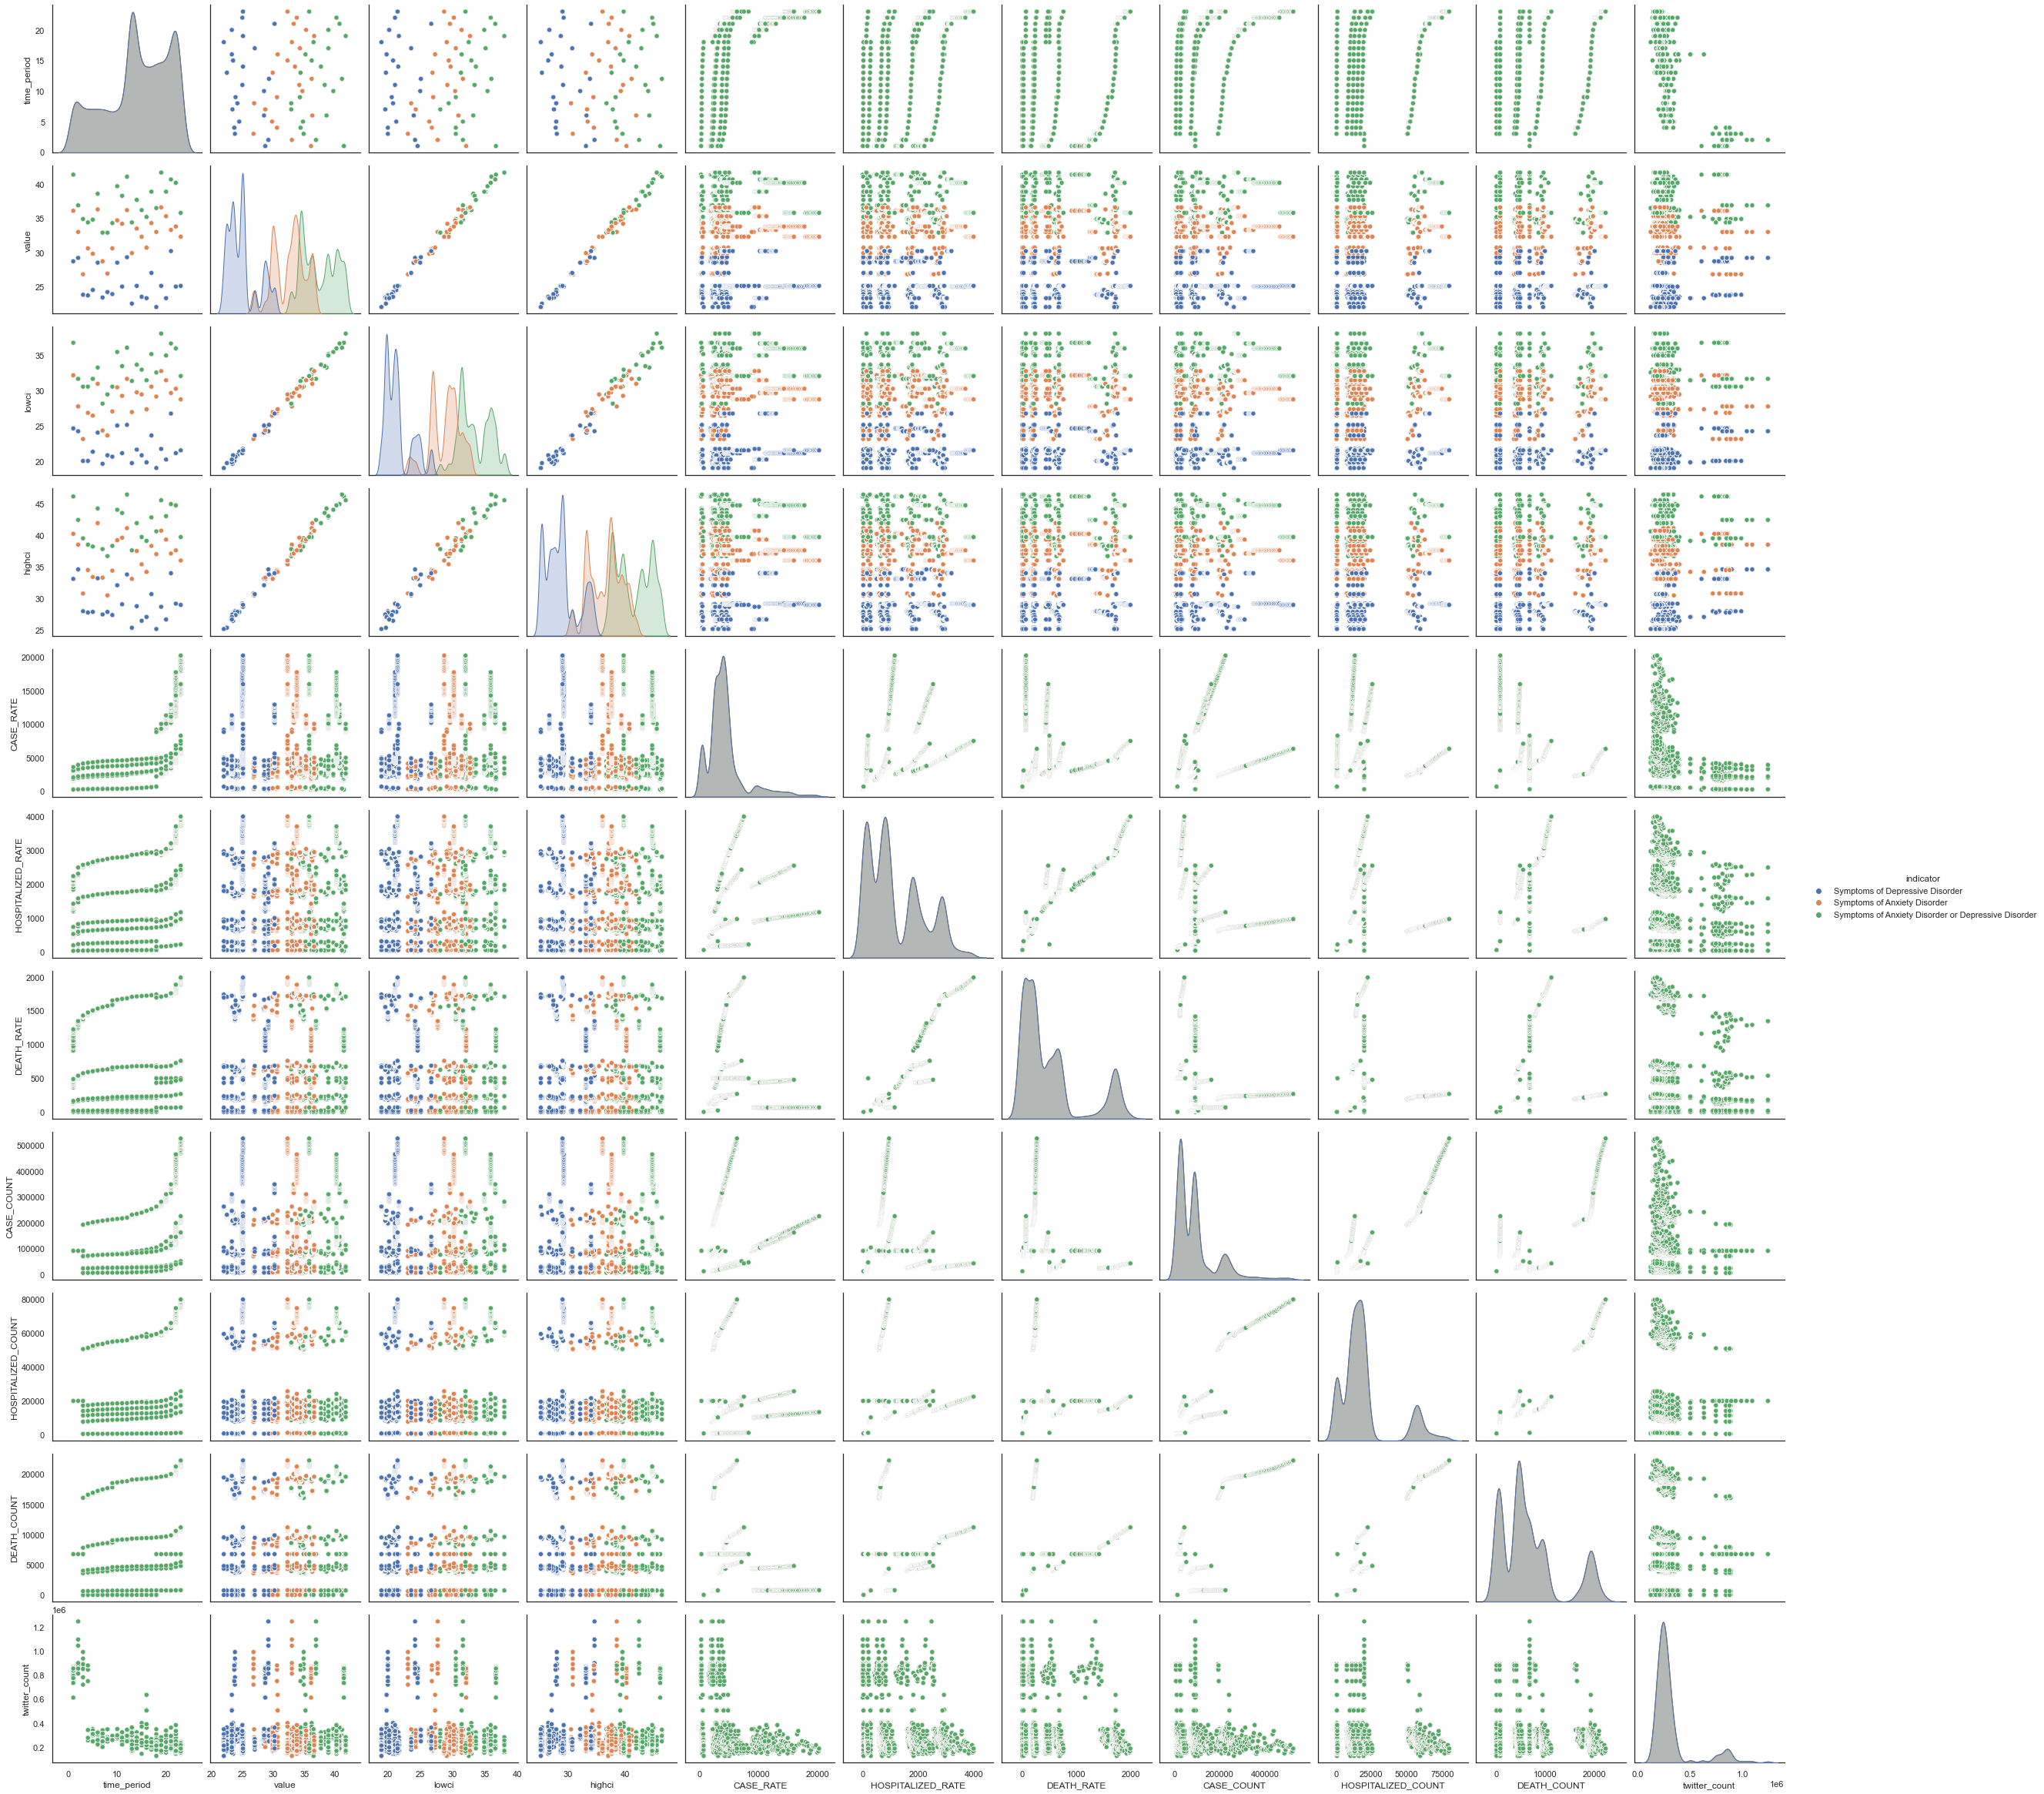

In [ ]:
plt.figure(figsize=(30,30))
sns.pairplot(data2.drop("phase", axis=1), hue="indicator", size=3)
plt.show()

<Figure size 1440x720 with 0 Axes>

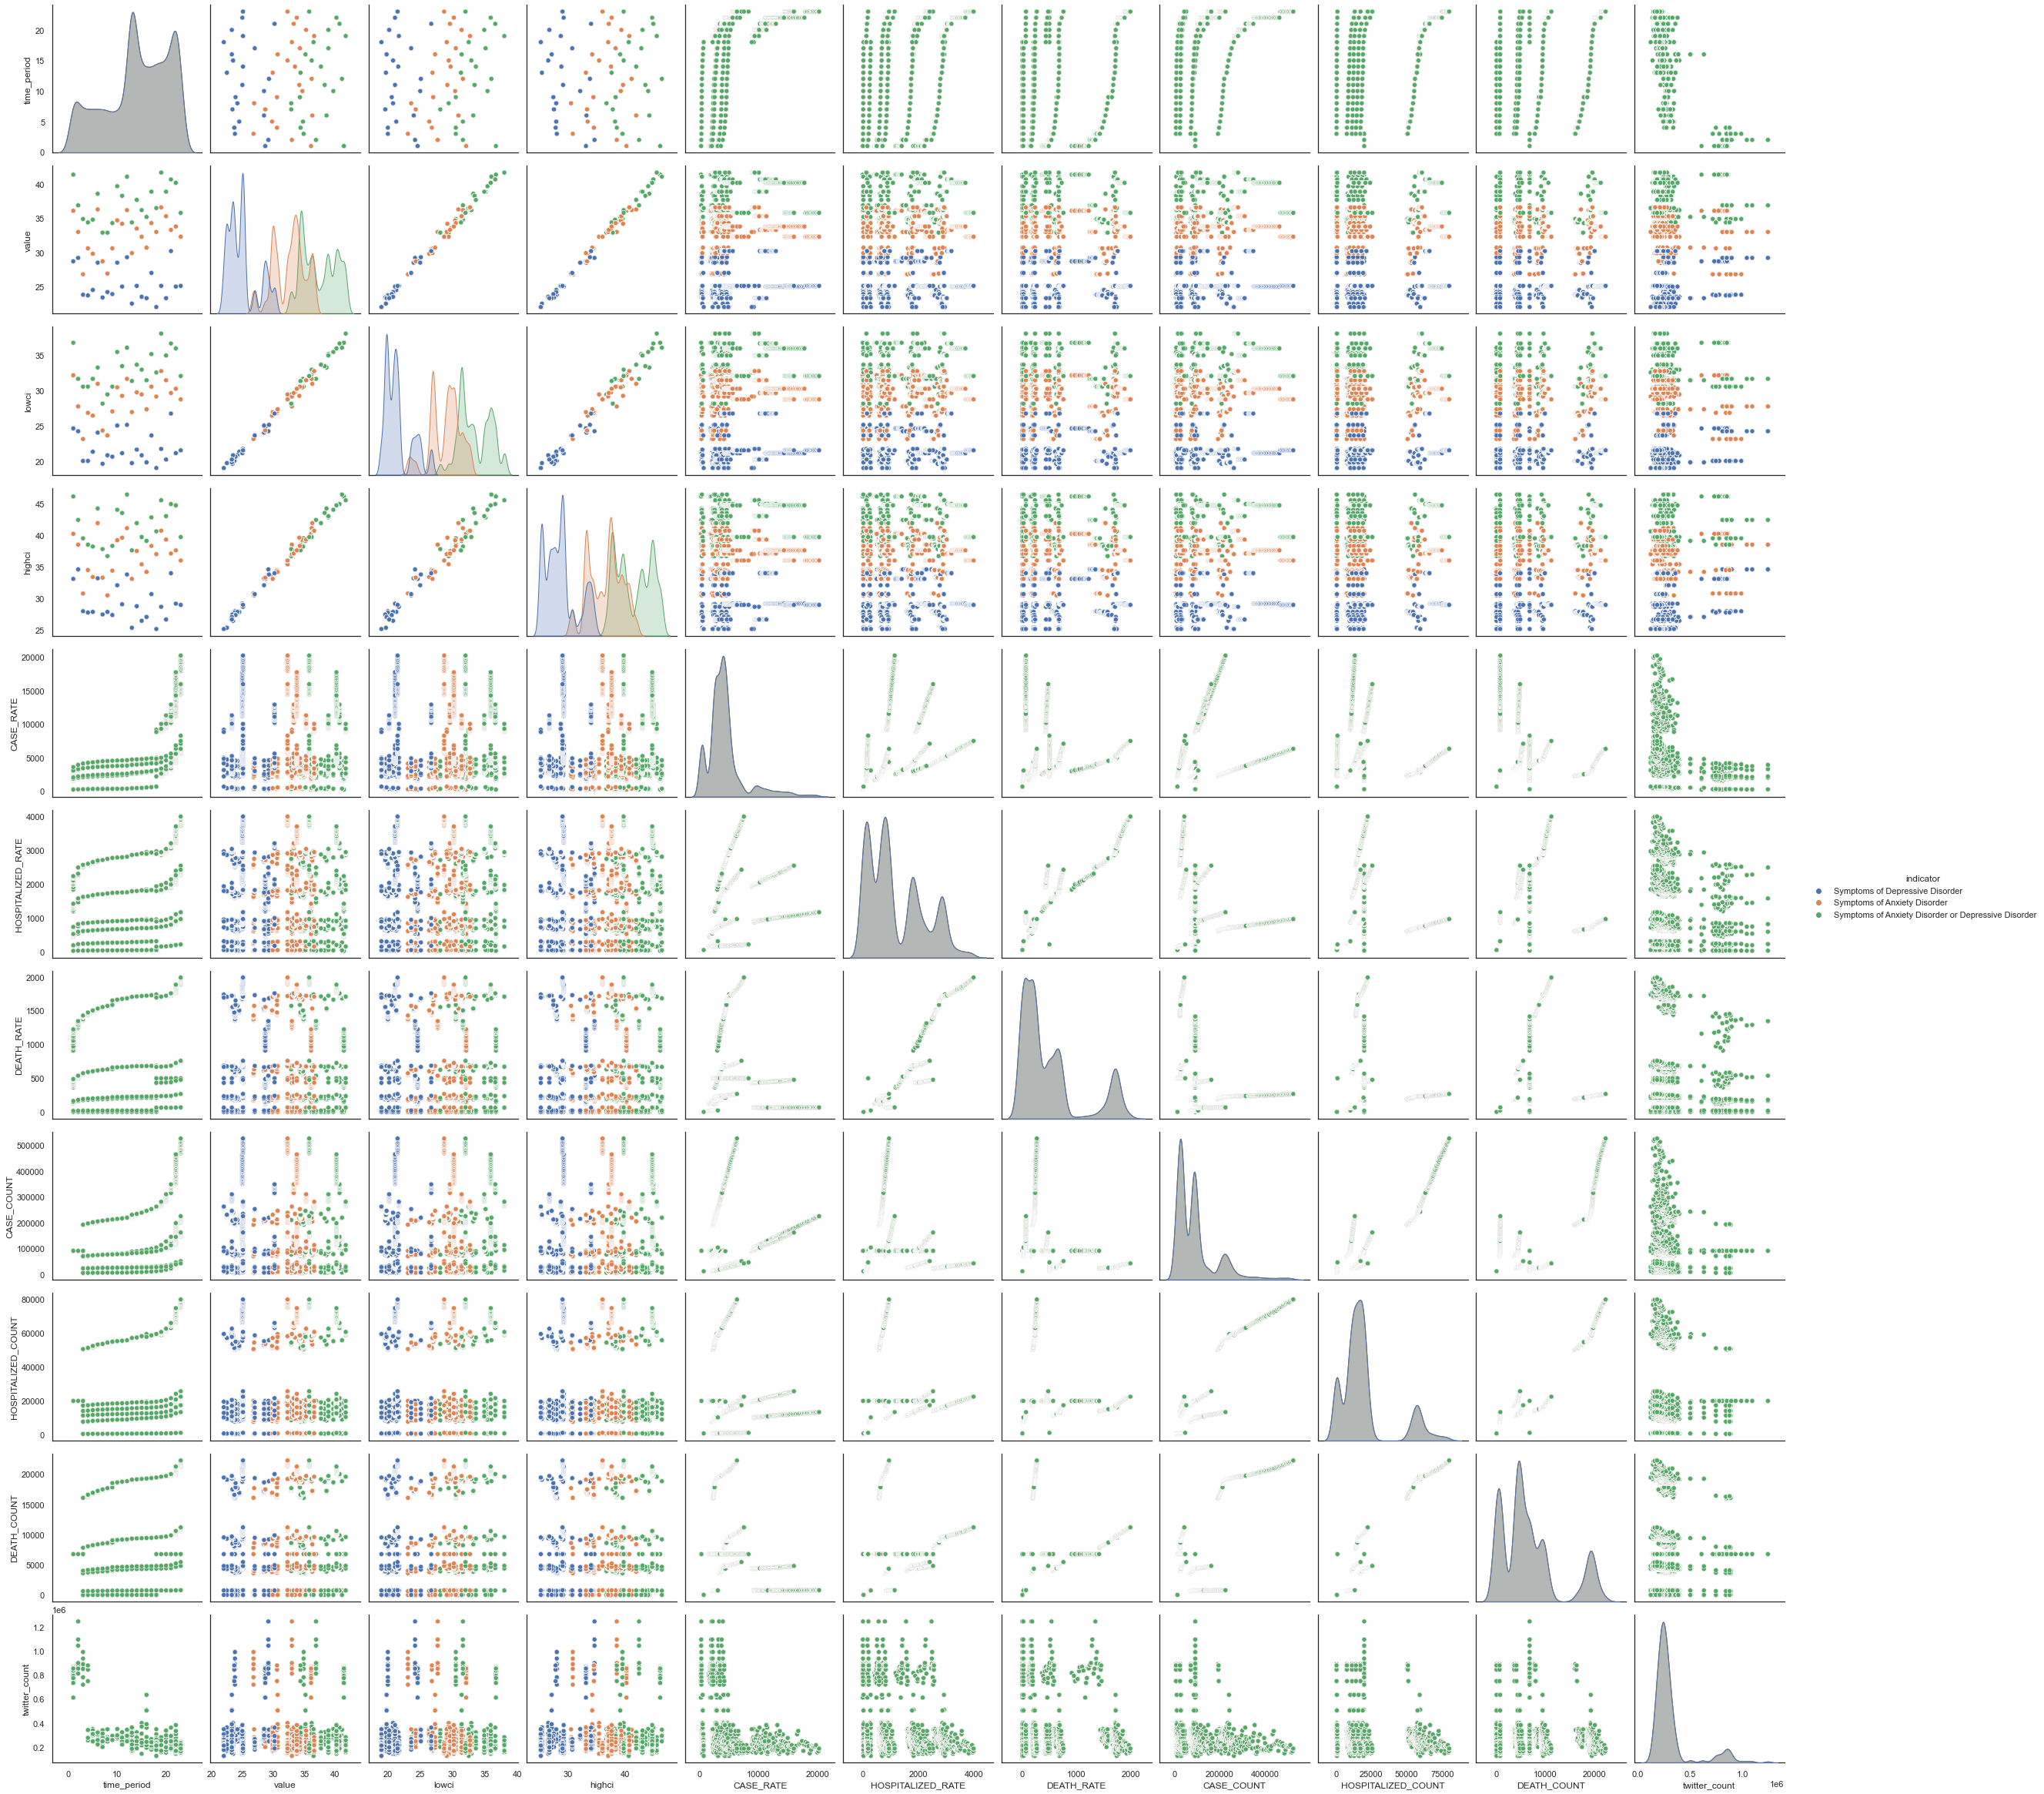

In [ ]:
plt.figure(figsize=(20,10))
sns.pairplot(data2.drop("phase", axis=1), hue="indicator", size=3, diag_kind="kde")
plt.show()

In [ ]:
"""# Use seaborn's jointplot to make a hexagonal bin plot
#Set desired size and ratio and choose a color.

#MIGHT NEED TO NORMALIZE HERE
data2["indicator"] = data2['indicator'].astype(float)
data2["indicator"].replace({"Symptoms of Anxiety Disorder": "1", "Symptoms of Depressive Disorder": "2", "Symptoms of Anxiety Disorder or Depressive Disorder": "3"}, inplace=True)
data2["age"].replace({"18 - 29 years": "29", "30 - 39 years": "39", "40 - 49 years": "49", "50 - 59 years":"59","60 - 69 years":"69","70 - 79 years":"79","80 years and above":"80"}, inplace=True)
data2["age"] = data2['age'].astype(float)
data2["indicator"] = data2['indicator'].astype(float)

def min_max_normalization(df):
    # copy the dataframe
    df_norm = df.copy()
    # apply min-max scaling
    for column in df_norm.columns:
        df_norm[column] = (df_norm[column] - df_norm[column].min()) / (df_norm[column].max() - df_norm[column].min())
        
    return df_norm

data2 = min_max_normalization(data2)

sns.jointplot(x="value", y="twitter_count", data=data2, size=10,ratio=10, kind='hex',color='green')
plt.show()"""

'# Use seaborn\'s jointplot to make a hexagonal bin plot\n#Set desired size and ratio and choose a color.\n\n#MIGHT NEED TO NORMALIZE HERE\ndata2["indicator"] = data2[\'indicator\'].astype(float)\ndata2["indicator"].replace({"Symptoms of Anxiety Disorder": "1", "Symptoms of Depressive Disorder": "2", "Symptoms of Anxiety Disorder or Depressive Disorder": "3"}, inplace=True)\ndata2["age"].replace({"18 - 29 years": "29", "30 - 39 years": "39", "40 - 49 years": "49", "50 - 59 years":"59","60 - 69 years":"69","70 - 79 years":"79","80 years and above":"80"}, inplace=True)\ndata2["age"] = data2[\'age\'].astype(float)\ndata2["indicator"] = data2[\'indicator\'].astype(float)\n\ndef min_max_normalization(df):\n    # copy the dataframe\n    df_norm = df.copy()\n    # apply min-max scaling\n    for column in df_norm.columns:\n        df_norm[column] = (df_norm[column] - df_norm[column].min()) / (df_norm[column].max() - df_norm[column].min())\n        \n    return df_norm\n\ndata2 = min_max_normal

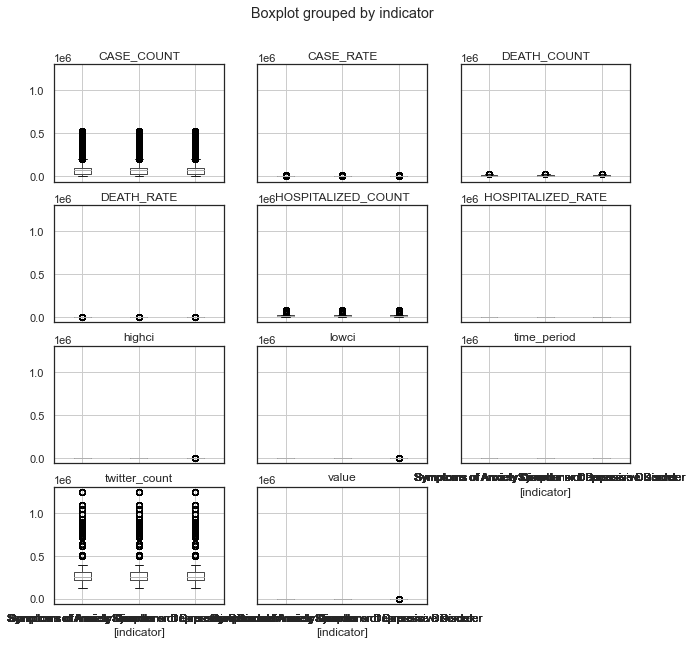

In [ ]:
# To make a Pandas boxplot grouped by species, use .boxplot
#Modify the figsize, by placing a value in the X and Y cordinates
data2.drop("phase", axis=1).boxplot(by="indicator", figsize=(10, 10))
plt.show()

In [267]:
# In order to ignore FutureWarning
#!pip install tensorflow
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

def create_custom_model(input_dim, output_dim, nodes, n=1, name='model'):
    def create_model():
        # Create model
        model = Sequential(name=name)
        for i in range(n):
            model.add(Dense(nodes, input_dim=input_dim, activation='relu'))
        model.add(Dense(output_dim, activation='softmax'))

        # Compile model
        model.compile(loss='categorical_crossentropy', 
                      optimizer='adam', 
                      metrics=['accuracy'])
        return model
    return create_model

models = [create_custom_model(n_features, n_classes, 14, i, 'model_{}_with_twitter'.format(i)) 
          for i in range(1, 4)]

for create_model in models:
    create_model().summary()

Model: "model_1_with_twitter"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_260 (Dense)            (None, 14)                210       
_________________________________________________________________
dense_261 (Dense)            (None, 3)                 45        
Total params: 255
Trainable params: 255
Non-trainable params: 0
_________________________________________________________________
Model: "model_2_with_twitter"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_262 (Dense)            (None, 14)                210       
_________________________________________________________________
dense_263 (Dense)            (None, 14)                210       
_________________________________________________________________
dense_264 (Dense)            (None, 3)                 45        
Total params: 465


In [268]:
from tensorflow.keras.callbacks import TensorBoard

history_dict = {}

# TensorBoard Callback
cb = TensorBoard()

for create_model in models:
    model = create_model()
    print('Model name:', model.name)
    history_callback = model.fit(X_train, Y_train,
                                 #Original Batch Size was 5. Need to change to a bigger value
                                 batch_size=256,
                                 epochs=68,
                                 verbose=0,
                                 validation_data=(X_test, Y_test),
                                 callbacks=[cb])
    score = model.evaluate(X_test, Y_test, verbose=0)
    print('Test loss:', score[0])
    print('Test accuracy:', score[1])
    
    history_dict[model.name] = [history_callback, model]

Model name: model_1_with_twitter
Test loss: 0.25058392152168
Test accuracy: 0.8836624441132638
Model name: model_2_with_twitter
Test loss: 0.15517109367668896
Test accuracy: 0.9232488822652757
Model name: model_3_with_twitter
Test loss: 0.07604001014702988
Test accuracy: 0.96274217585693


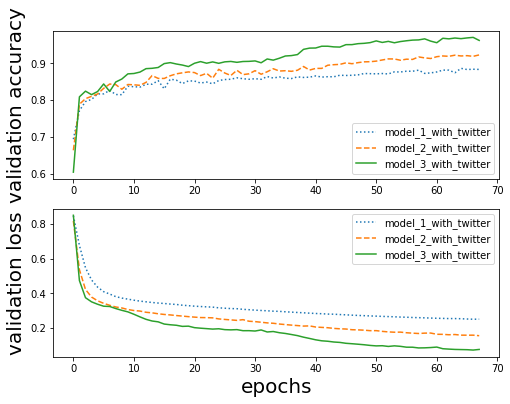

In [269]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(8, 6))

for model_name in history_dict:
    val_acc = history_dict[model_name][0].history['val_accuracy']
    val_loss = history_dict[model_name][0].history['val_loss']
    if(model_name in "model_1_with_twitter"):
        ax1.plot(val_acc, label=model_name, linestyle='dotted')
        ax2.plot(val_loss, label=model_name, linestyle='dotted')
    if(model_name in "model_2_with_twitter"):
        ax1.plot(val_acc, label=model_name, linestyle='dashed')
        ax2.plot(val_loss, label=model_name, linestyle='dashed')
    if(model_name in "model_3_with_twitter"):
        ax1.plot(val_acc, label=model_name, linestyle='solid')
        ax2.plot(val_loss, label=model_name, linestyle='solid')
    
ax1.set_ylabel('validation accuracy', fontsize=20)
ax2.set_ylabel('validation loss', fontsize=20)
ax2.set_xlabel('epochs', fontsize=20)
ax1.legend()
ax2.legend()
plt.show()

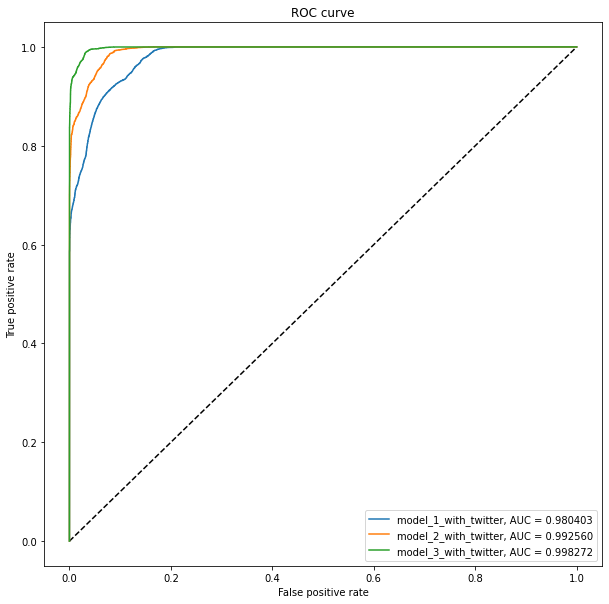

In [270]:
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(10, 10))
plt.plot([0, 1], [0, 1], 'k--')

for model_name in history_dict:
    model = history_dict[model_name][1]
    
    Y_pred = model.predict(X_test)
    fpr, tpr, threshold = roc_curve(Y_test.ravel(), Y_pred.ravel())
    
    plt.plot(fpr, tpr, label='{}, AUC = {:.6f}'.format(model_name, auc(fpr, tpr)))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend();

In [271]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score

create_model = create_custom_model(n_features, n_classes, 14, 3)

estimator = KerasClassifier(build_fn=create_model, epochs=68, batch_size=268, verbose=0)
scores = cross_val_score(estimator, X_train, Y_train, cv=10)
print("Accuracy : {:0.2f} (+/- {:0.2f})".format(scores.mean(), scores.std()))

Accuracy : 0.95 (+/- 0.02)


In [272]:
checker = create_model()

In [273]:
checker.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_318 (Dense)            (None, 14)                210       
_________________________________________________________________
dense_319 (Dense)            (None, 14)                210       
_________________________________________________________________
dense_320 (Dense)            (None, 14)                210       
_________________________________________________________________
dense_321 (Dense)            (None, 3)                 45        
Total params: 675
Trainable params: 675
Non-trainable params: 0
_________________________________________________________________


In [227]:
X_test

0         1         2   ...        11        12        13
19462  0.25  0.636364  0.076142  ...  0.421673  0.705882  0.294118
10403  0.00  0.500000  0.969543  ...  0.842626  0.666667  0.333333
17825  0.25  0.590909  0.157360  ...  0.860177  0.803922  0.196078
20194  0.25  0.681818  0.670051  ...  0.422213  0.313725  0.686275
34324  1.00  1.000000  0.700508  ...  0.481436  0.862745  0.137255
...     ...       ...       ...  ...       ...       ...       ...
17009  0.25  0.590909  0.796954  ...  0.858197  0.764706  0.235294
27670  0.75  0.863636  0.065990  ...  0.432699  0.254902  0.745098
17070  0.25  0.590909  0.583756  ...  0.000090  0.843137  0.156863
28931  0.75  0.909091  0.416244  ...  0.886279  0.274510  0.725490
1709   0.00  0.045455  0.756345  ...  0.303533  0.470588  0.529412

[10736 rows x 14 columns]

In [228]:
!pip install -q ann_visualizer
from ann_visualizer.visualize import ann_viz

In [274]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, Activation;
import numpy
import tensorflow
tensorflow.keras.backend.set_floatx('float64')

# fix random seed for reproducibility
numpy.random.seed(7)
# load pima indians dataset
#dataset = numpy.loadtxt('/Users/yadavn/ATsCombined.csv', delimiter=",")
# split into input (X) and output (rflow.keY) variables
# create model
model = Sequential()
model.add(Dense(14,activation='relu'))
model.add(Dense(7, activation='relu'))
model.add(Dense(3, activation='softmax'))
# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# Fit the model
ann = model.fit(X_train, Y_train, epochs=68, batch_size=256)
# evaluate the model
scores = model.evaluate(X_test, Y_test)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

Epoch 1/68
98/98 [==============================] - 1s 3ms/step - loss: 0.9616 - accuracy: 0.5885
Epoch 2/68
98/98 [==============================] - 0s 2ms/step - loss: 0.6361 - accuracy: 0.7838
Epoch 3/68
98/98 [==============================] - 0s 2ms/step - loss: 0.4596 - accuracy: 0.8105
Epoch 4/68
98/98 [==============================] - 0s 2ms/step - loss: 0.3911 - accuracy: 0.8144
Epoch 5/68
98/98 [==============================] - 0s 2ms/step - loss: 0.3601 - accuracy: 0.8263
Epoch 6/68
98/98 [==============================] - 0s 2ms/step - loss: 0.3423 - accuracy: 0.8323
Epoch 7/68
98/98 [==============================] - 0s 2ms/step - loss: 0.3283 - accuracy: 0.8397
Epoch 8/68
98/98 [==============================] - 0s 2ms/step - loss: 0.3169 - accuracy: 0.8467
Epoch 9/68
98/98 [==============================] - 0s 2ms/step - loss: 0.3068 - accuracy: 0.8513
Epoch 10/68
98/98 [==============================] - 0s 2ms/step - loss: 0.2991 - accuracy: 0.8537
Epoch 11/68
98/98 [

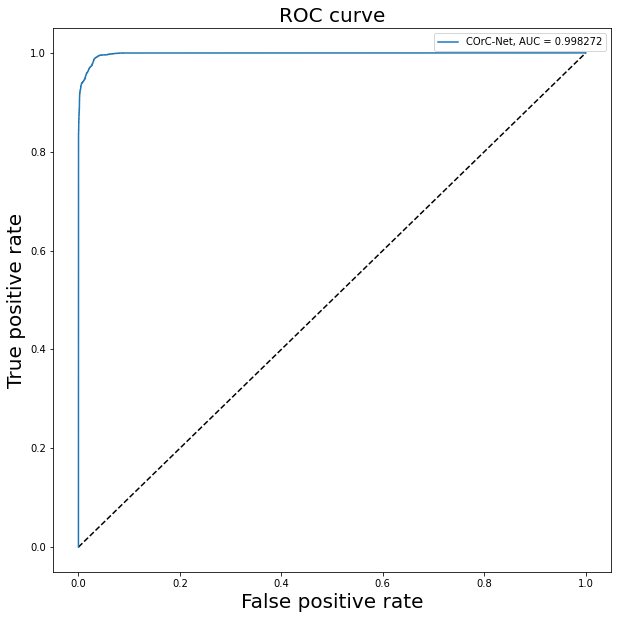

In [275]:
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(10, 10))
plt.plot([0, 1], [0, 1], 'k--')

for model_name in history_dict:
    model = history_dict[model_name][1]
    Y_pred = model.predict(X_test)
    fpr, tpr, threshold = roc_curve(Y_test.ravel(), Y_pred.ravel())
    
plt.plot(fpr, tpr, label='{}, AUC = {:.6f}'.format("COrC-Net", auc(fpr, tpr), fontsize=30))   
plt.xlabel('False positive rate', fontsize=20)
plt.ylabel('True positive rate', fontsize=20)
plt.title('ROC curve', fontsize=20)
plt.legend();

In [276]:
"""# define one new instance
Xnew = [[0.70, 0.75, 0.09, .75, .95, .155, .3, .25, .35, .66, .97, .12]]
# make a prediction
# define one new instance
#Xnew = [[0.70, 1.75, 0.0, .25, .155, .155, 1, .25, .35, .66, .97, .88]]
# make a prediction showing all possible probabilities across the classses
ynew = checker.predict(Xnew)
print("X=%s, Predicted=%s" % (Xnew[0], ynew[0]))
# Predict the final class
ynew = checker.predict_classes(Xnew)
print("X=%s, Predicted=%s" % (Xnew[0], ynew[0]))"""

'# define one new instance\nXnew = [[0.70, 0.75, 0.09, .75, .95, .155, .3, .25, .35, .66, .97, .12]]\n# make a prediction\n# define one new instance\n#Xnew = [[0.70, 1.75, 0.0, .25, .155, .155, 1, .25, .35, .66, .97, .88]]\n# make a prediction showing all possible probabilities across the classses\nynew = checker.predict(Xnew)\nprint("X=%s, Predicted=%s" % (Xnew[0], ynew[0]))\n# Predict the final class\nynew = checker.predict_classes(Xnew)\nprint("X=%s, Predicted=%s" % (Xnew[0], ynew[0]))'

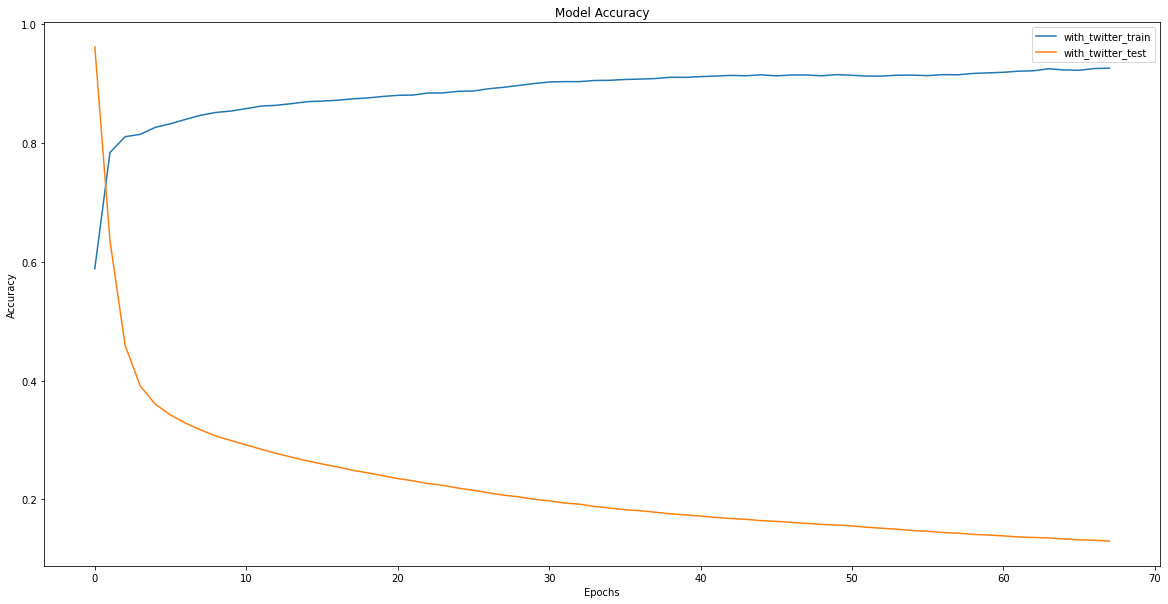

In [277]:
plt.plot(ann.history['accuracy'])
plt.plot(ann.history['loss'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['with_twitter_train', 'with_twitter_test'])
plt.show()

In [278]:
import numpy as np
pred=model.predict(X_test)
pred_digits=np.argmax(pred,axis=1)
y_train_ad = np.argmax(Y_train, axis=1)

In [279]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, pred.round()))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94      3580
           1       1.00      0.98      0.99      3571
           2       0.94      0.97      0.95      3585

   micro avg       0.96      0.96      0.96     10736
   macro avg       0.96      0.96      0.96     10736
weighted avg       0.96      0.96      0.96     10736
 samples avg       0.96      0.96      0.96     10736



In [280]:
(Y_test == pred)

array([[False, False, False],
       [False, False, False],
       [False, False, False],
       ...,
       [False, False, False],
       [False, False, False],
       [False, False, False]])

In [281]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test.argmax(axis=1), pred.round().argmax(axis=1))

array([[3340,    0,  240],
       [  65, 3506,    0],
       [  95,    0, 3490]])

In [69]:
from scipy.stats import chi2_contingency

import numpy as np
from scipy.stats import ttest_ind

res = ttest_ind(Y_test, pred)

print(res)

Ttest_indResult(statistic=array([-1.48183175, -0.37819371,  1.86856914]), pvalue=array([0.13839975, 0.70529043, 0.06169639]))


In [282]:
#read in the data
ny = pd.read_csv('./new_york.csv')
ny["indicator"].replace({"Symptoms of Anxiety Disorder": "0", "Symptoms of Depressive Disorder": "1", "Symptoms of Anxiety Disorder or Depressive Disorder": "2"}, inplace=True)
ny["age"].replace({"18 - 29 years": "29", "30 - 39 years": "39", "40 - 49 years": "49", "50 - 59 years":"59","60 - 69 years":"69","70 - 79 years":"79","80 years and above":"80"}, inplace=True)
data_to_use = ny
del data_to_use['group']
del data_to_use['state']
del data_to_use['subgroup']
del data_to_use['time_period_label']
del data_to_use['confidence_interval']
del data_to_use['quartile_range']
del data_to_use['counts']
del data_to_use['phase']
del data_to_use['time_period_start_date']
del data_to_use['time_period_end_date']
del data_to_use['lowci']
del data_to_use['highci']
del data_to_use['age']


ny = data_to_use
ny['DEATH_RATE'].fillna((ny['DEATH_RATE'].mean()), inplace=True)
ny.isna().sum()
from sklearn import preprocessing

"""ny["age"] = ny['age'].astype(float)
ny["phase"] = ny['phase'].astype(float)"""
ny["indicator"] = ny['indicator'].astype(float)
ny["time_period"] = ny['time_period'].astype(float)
ny = ny[['time_period', 'value', 'CASE_RATE', 'HOSPITALIZED_RATE','DEATH_RATE','CASE_COUNT','HOSPITALIZED_COUNT','DEATH_COUNT','indicator']]
values = ny.values
 
Y = values[:,-1]
X = values[:,0:8]
random_seed = 12
names = ['Symptoms of Anxiety Disorder', 'Symptoms of Depression Disorder', 'Symptoms of Anxiety or Depression Disorder' ]
feature_names = ['phase', 'time_period', 'value', 'lowci', 'highci', 'age', 'CASE_RATE', 'HOSPITALIZED_RATE', 'DEATH_RATE', 'CASE_COUNT', 'HOSPITALIZED_COUNT', 'DEATH_COUNT']
import pandas as pd
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier

min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(X)
X = pd.DataFrame(x_scaled)

import numpy as nump
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
enc = OneHotEncoder()
Y = enc.fit_transform(Y[:, nump.newaxis]).toarray()

X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.3, random_state=2)
n_features = X.shape[1]
n_classes = Y.shape[1]
# In order to ignore FutureWarning
#!pip install tensorflow
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

def create_custom_model(input_dim, output_dim, nodes, n=1, name='model'):
    def create_model():
        # Create model
        model = Sequential(name=name)
        for i in range(n):
            model.add(Dense(nodes, input_dim=input_dim, activation='relu'))
        model.add(Dense(output_dim, activation='softmax'))

        # Compile model
        model.compile(loss='categorical_crossentropy', 
                      optimizer='adam', 
                      metrics=['accuracy'])
        return model
    return create_model

models = [create_custom_model(n_features, n_classes, 8, i, 'model_{}_without_twitter'.format(i)) 
          for i in range(1, 4)]

for create_model in models:
    create_model().summary()

Model: "model_1_without_twitter"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_325 (Dense)            (None, 8)                 72        
_________________________________________________________________
dense_326 (Dense)            (None, 3)                 27        
Total params: 99
Trainable params: 99
Non-trainable params: 0
_________________________________________________________________
Model: "model_2_without_twitter"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_327 (Dense)            (None, 8)                 72        
_________________________________________________________________
dense_328 (Dense)            (None, 8)                 72        
_________________________________________________________________
dense_329 (Dense)            (None, 3)                 27        
Total params: 

In [283]:
from tensorflow.keras.callbacks import TensorBoard

history_dict2 = {}

# TensorBoard Callback
cb = TensorBoard()

for create_model in models:
    model = create_model()
    print('Model name:', model.name)
    history_callback = model.fit(X_train, Y_train,
                                 #Original Batch Size was 5. Need to change to a bigger value
                                 batch_size=256,
                                 epochs=68,
                                 verbose=0,
                                 validation_data=(X_test, Y_test),
                                 callbacks=[cb])
    score = model.evaluate(X_test, Y_test, verbose=0)
    print('Test loss:', score[0])
    print('Test accuracy:', score[1])
    
    history_dict2[model.name] = [history_callback, model]

Model name: model_1_without_twitter
Test loss: 0.36956100585563706
Test accuracy: 0.7982488822652757
Model name: model_2_without_twitter
Test loss: 0.23757259727590307
Test accuracy: 0.9033159463487332
Model name: model_3_without_twitter
Test loss: 0.24949102601155795
Test accuracy: 0.8833830104321908


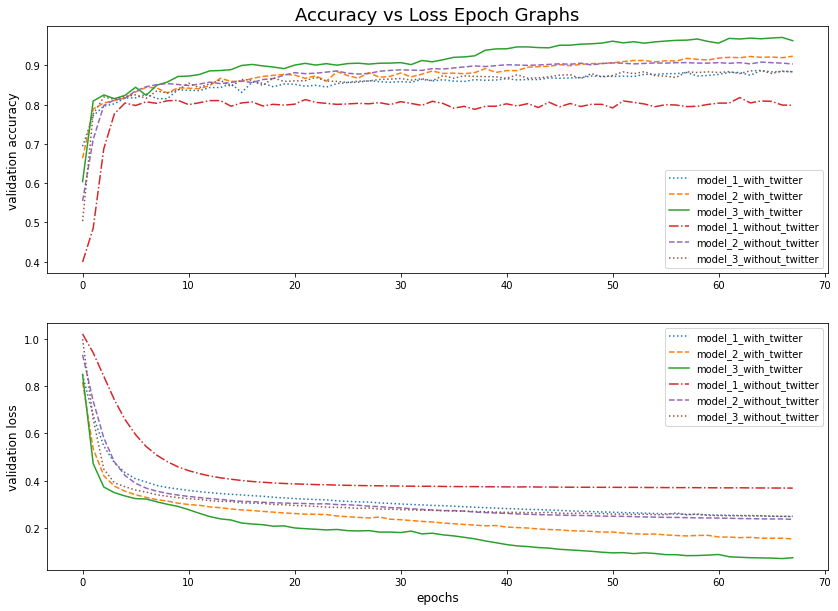

In [297]:

fig, (ax1, ax2) = plt.subplots(2, figsize=(14, 10))


for model_name in history_dict:
    val_acc = history_dict[model_name][0].history['val_accuracy']
    val_loss = history_dict[model_name][0].history['val_loss']
    if(model_name in "model_1_with_twitter"):
        ax1.plot(val_acc, label=model_name, linestyle='dotted')
        ax2.plot(val_loss, label=model_name, linestyle='dotted')
    if(model_name in "model_2_with_twitter"):
        ax1.plot(val_acc, label=model_name, linestyle='dashed')
        ax2.plot(val_loss, label=model_name, linestyle='dashed')
    if(model_name in "model_3_with_twitter"):
        ax1.plot(val_acc, label=model_name, linestyle='solid')
        ax2.plot(val_loss, label=model_name, linestyle='solid')


for model_name in history_dict2:
      val_acc2 = history_dict2[model_name][0].history['val_accuracy']
      val_loss2 = history_dict2[model_name][0].history['val_loss']
      if(model_name in "model_1_without_twitter"):
        ax1.plot(val_acc2, label=model_name, linestyle='dashdot')
        ax2.plot(val_loss2, label=model_name, linestyle='dashdot')
      if(model_name in "model_2_without_twitter"):
        ax1.plot(val_acc2, label=model_name, linestyle='dashed')
        ax2.plot(val_loss2, label=model_name, linestyle='dashed')
      if(model_name in "model_3_without_twitter"):
        ax1.plot(val_acc2, label=model_name, linestyle='dotted')
        ax2.plot(val_loss2, label=model_name, linestyle='dotted')

ax1.set_ylabel('validation accuracy', fontsize=12)
ax1.set_title("Accuracy vs Loss Epoch Graphs", fontsize=18)
ax2.set_ylabel('validation loss', fontsize=12)
ax2.set_xlabel('epochs', fontsize=12)
ax1.legend()
ax2.legend()
plt.show()
pass;

In [ ]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score

create_model = create_custom_model(n_features, n_classes, 8, 3)

estimator = KerasClassifier(build_fn=create_model, epochs=68, batch_size=256, verbose=0)
scores = cross_val_score(estimator, X_train, Y_train, cv=10)
print("Accuracy : {:0.2f} (+/- {:0.2f})".format(scores.mean(), scores.std()))

In [293]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, Activation;
import numpy
import tensorflow
tensorflow.keras.backend.set_floatx('float64')

# fix random seed for reproducibility
numpy.random.seed(7)
# load pima indians dataset
#dataset = numpy.loadtxt('/Users/yadavn/ATsCombined.csv', delimiter=",")
# split into input (X) and output (rflow.keY) variables
# create model
model = Sequential()
model.add(Dense(8,activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(3, activation='softmax'))
# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# Fit the model
ann2 = model.fit(X_train, Y_train, epochs=68, batch_size=256)
# evaluate the model
scores = model.evaluate(X_test, Y_test)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

Epoch 1/68
98/98 [==============================] - 1s 3ms/step - loss: 1.0793 - accuracy: 0.3979
Epoch 2/68
98/98 [==============================] - 0s 2ms/step - loss: 0.9369 - accuracy: 0.5934
Epoch 3/68
98/98 [==============================] - 0s 3ms/step - loss: 0.6795 - accuracy: 0.7945
Epoch 4/68
98/98 [==============================] - 0s 2ms/step - loss: 0.5194 - accuracy: 0.8145
Epoch 5/68
98/98 [==============================] - 0s 3ms/step - loss: 0.4455 - accuracy: 0.8172
Epoch 6/68
98/98 [==============================] - 0s 3ms/step - loss: 0.4105 - accuracy: 0.8079
Epoch 7/68
98/98 [==============================] - 0s 2ms/step - loss: 0.3933 - accuracy: 0.8074
Epoch 8/68
98/98 [==============================] - 0s 3ms/step - loss: 0.3844 - accuracy: 0.8035
Epoch 9/68
98/98 [==============================] - 0s 3ms/step - loss: 0.3776 - accuracy: 0.8074
Epoch 10/68
98/98 [==============================] - 0s 3ms/step - loss: 0.3733 - accuracy: 0.8087
Epoch 11/68
98/98 [

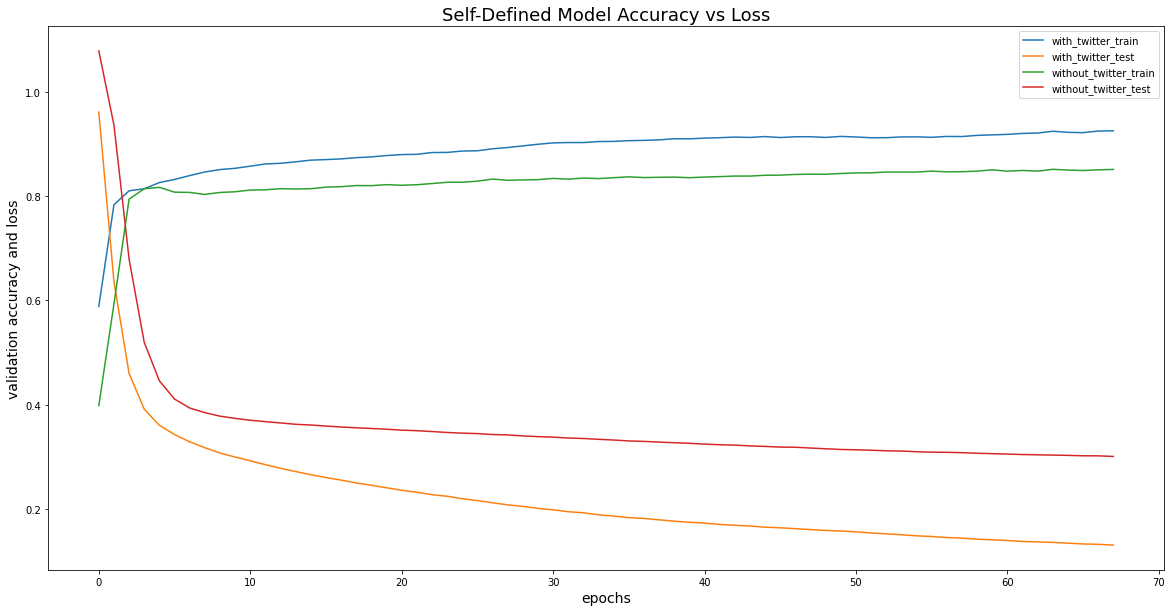

In [304]:
plt.plot(ann.history['accuracy'])
plt.plot(ann.history['loss'])
plt.plot(ann2.history['accuracy'])
plt.plot(ann2.history['loss'])
plt.title('Self-Defined Model Accuracy vs Loss' , fontsize=18)
plt.ylabel('validation accuracy and loss', fontsize=14)
plt.xlabel('epochs', fontsize=14)
plt.legend(['with_twitter_train', 'with_twitter_test', 'without_twitter_train', 'without_twitter_test'])
plt.show()

In [300]:
ann2.history

{'accuracy': [0.3979160012775471,
  0.5933807090386458,
  0.7945145320983711,
  0.8144762056850846,
  0.8171510699457043,
  0.8079287767486426,
  0.8074097732353881,
  0.8035372085595657,
  0.8073698498882146,
  0.8086873203449377,
  0.8119610348131587,
  0.8124401149792398,
  0.8145560523794315,
  0.8139971255190035,
  0.8145560523794315,
  0.8175103800702651,
  0.8184685404024273,
  0.820584477802619,
  0.8204247844139253,
  0.8223011817310764,
  0.8211833280102204,
  0.822181411689556,
  0.8244570424784414,
  0.8268923666560204,
  0.8269722133503673,
  0.8290482274033855,
  0.8330405621207282,
  0.8307250079846694,
  0.8314037048866177,
  0.8319626317470457,
  0.8342781858831044,
  0.8329607154263814,
  0.8349568827850526,
  0.8340386458000639,
  0.8356755030341744,
  0.8373522836154583,
  0.8359549664643884,
  0.8364739699776429,
  0.8368732034493772,
  0.8356755030341744,
  0.8369131267965506,
  0.8377515170871926,
  0.8388294474608751,
  0.8388294474608751,
  0.8403864580006388,


In [ ]:
 import numpy as np
pred=model.predict(X_test)
pred_digits=np.argmax(pred,axis=1)
y_train_ad = np.argmax(Y_train, axis=1)

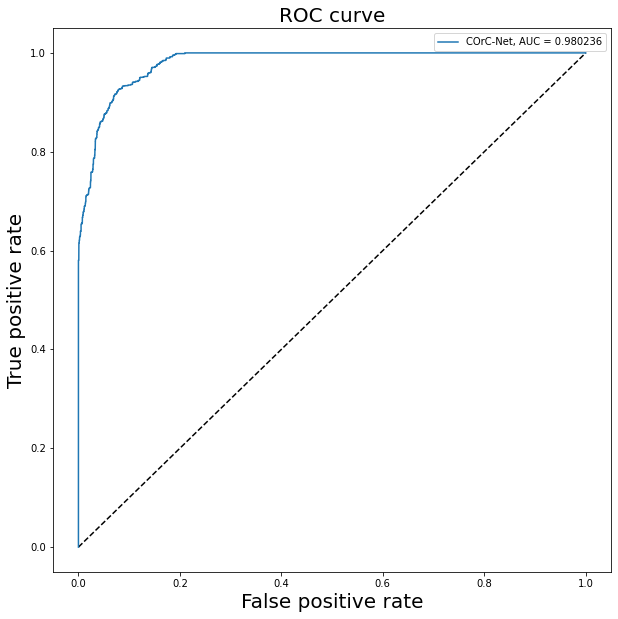

In [294]:
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(10, 10))
plt.plot([0, 1], [0, 1], 'k--')

for model_name in history_dict2:
    model = history_dict2[model_name][1]
    Y_pred = model.predict(X_test)
    fpr, tpr, threshold = roc_curve(Y_test.ravel(), Y_pred.ravel())
    
plt.plot(fpr, tpr, label='{}, AUC = {:.6f}'.format("COrC-Net", auc(fpr, tpr), fontsize=30))   
plt.xlabel('False positive rate', fontsize=20)
plt.ylabel('True positive rate', fontsize=20)
plt.title('ROC curve', fontsize=20)
plt.legend();

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, pred.round()))

ValueError: ignored

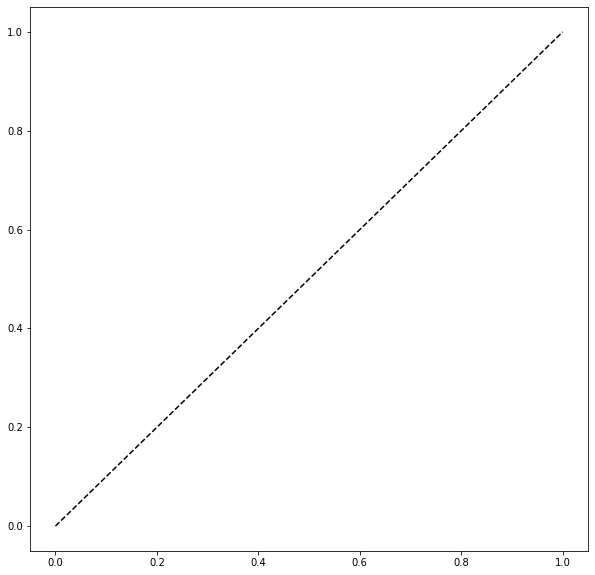

In [291]:
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(10, 10))
plt.plot([0, 1], [0, 1], 'k--')

for model_name in history_dict:
    model = history_dict[model_name][1]
    
    Y_pred = model.predict(X_test)
    fpr, tpr, threshold = roc_curve(Y_test.ravel(), Y_pred.ravel())
    
    plt.plot(fpr, tpr, label='{}, AUC = {:.6f}'.format(model_name, auc(fpr, tpr)))

for model_name in history_dict2:
    model = history_dict2[model_name][1]
    
    Y_pred = model.predict(X_test)
    fpr, tpr, threshold = roc_curve(Y_test.ravel(), Y_pred.ravel())
    
    plt.plot(fpr, tpr, label='{}, AUC = {:.6f}'.format(model_name, auc(fpr, tpr)))

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend();